# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import pickle

# Loading the data

In [4]:
df1 = pd.read_csv("sales.csv")
pd.set_option('display.max_columns', None)
df1.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   
3       NoSewr    Paved      I       4.7          3.9         3.6       4.010   
4        AllPub  Gravel      C       3.0          2.5         4.1       3.290   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200  
3   356321   77042      9630290  
4   237000   74063      7406250

In [5]:
df1.shape

(7109, 22)

In [6]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# 1.DATA CLEANING

In [7]:
df1.AREA.value_counts().index

Index(['Chrompet', 'Karapakkam', 'KK Nagar', 'Velachery', 'Anna Nagar',
       'Adyar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Chormpet', 'TNagar',
       'Karapakam', 'Ana Nagar', 'Velchery', 'Ann Nagar', 'Adyr', 'KKNagar'],
      dtype='object')

##### df1.AREA------>this feature contains many misspelled entries and we have to replace them with correct entry.

In [8]:
a=["Chrompt","Chormpet","Chrmpet","TNagar","Adyr","Ann Nagar","Ana Nagar","Karapakam","Velchery","KKNagar"]
b=["Chrompet","Chrompet","Chrompet","T Nagar","Adyar","Anna Nagar","Anna Nagar","Karapakkam","Velachery","KK Nagar"]

In [9]:
df1.AREA = df1.AREA.replace(a,b)


In [10]:
df1.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

##### checking df1.UTILITY_AVAIL feature for misspelled words

In [11]:
df1.UTILITY_AVAIL.value_counts().index

Index(['AllPub', 'NoSeWa', 'NoSewr ', 'ELO', 'All Pub'], dtype='object')

##### replacing the entries..

In [12]:
df1.UTILITY_AVAIL=df1.UTILITY_AVAIL.replace(["All Pub","NoSewr "],["AllPub","NoSewr"])

In [13]:
df1.UTILITY_AVAIL.value_counts().index

Index(['AllPub', 'NoSeWa', 'NoSewr', 'ELO'], dtype='object')

##### checking df1.BUILDTYPE feature for misspelled words

In [14]:
df1.BUILDTYPE.value_counts().index

Index(['House', 'Commercial', 'Others', 'Other', 'Comercial'], dtype='object')

##### replacing the entries.

In [15]:
df1.BUILDTYPE=df1.BUILDTYPE.replace(["Other","Comercial"],["Commercial","Others"])

In [16]:
df1.BUILDTYPE.value_counts()

House         2444
Commercial    2351
Others        2314
Name: BUILDTYPE, dtype: int64

######  checking df1.SALE_COND feature for misspelled words

In [17]:
df1.SALE_COND.value_counts().index

Index(['AdjLand', 'Partial', 'Normal Sale', 'AbNormal', 'Family', 'Adj Land',
       'Ab Normal', 'Partiall', 'PartiaLl'],
      dtype='object')

##### replacing the entries.


In [18]:
df1.SALE_COND=df1.SALE_COND.replace(["Adj Land","Partiall","PartiaLl","Ab Normal"],["AdjLand","Partial","Partial","AbNormal"])

In [19]:
df1.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

##### checking df1.SALE_COND feature for misspelled words

In [20]:
df1.STREET.value_counts().index

Index(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype='object')

##### replacing the entries....

In [21]:
df1.STREET=df1.STREET.replace(["Pavd","NoAccess"],["Paved","No Access"])

#### All the features having mispelled entries has been corrected..


#### checking df1.PARK_FACIL feature for misspelled words

In [22]:
df1.PARK_FACIL.value_counts().index

Index(['Yes', 'No', 'Noo'], dtype='object')

In [23]:
df1.PARK_FACIL=df1.PARK_FACIL.replace("Noo","No")

# 2.checking for null values.


In [24]:
df1.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

##### hence ,the null values present in df1[N_BEDROOM,N_BATHROOM,QS_OVERALL] are very less and we can drop that rows ..


In [25]:
df2=df1.dropna(how="any")# dropping the rows having null values

#### rechecking whether the null values are removed..


In [26]:
df2.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

#### All the null values in our data is removed..


# 3.changing the dtypes of columns

In [27]:
# changing the dtypes of N_BEDROOM , N_BATHROOM from float to int
df2.N_BEDROOM = df2.N_BEDROOM.astype(int)
df2.N_BATHROOM = df2.N_BATHROOM.astype(int)

In [28]:
# changing the dtypes of Date columns from object to datetime format
df2.DATE_SALE = pd.to_datetime(df2.DATE_SALE, format='%d-%m-%Y')
df2.DATE_BUILD = pd.to_datetime(df2.DATE_BUILD, format='%d-%m-%Y')

#### verifying the change in dtypes of columns..

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7056 non-null   object        
 1   AREA           7056 non-null   object        
 2   INT_SQFT       7056 non-null   int64         
 3   DATE_SALE      7056 non-null   datetime64[ns]
 4   DIST_MAINROAD  7056 non-null   int64         
 5   N_BEDROOM      7056 non-null   int32         
 6   N_BATHROOM     7056 non-null   int32         
 7   N_ROOM         7056 non-null   int64         
 8   SALE_COND      7056 non-null   object        
 9   PARK_FACIL     7056 non-null   object        
 10  DATE_BUILD     7056 non-null   datetime64[ns]
 11  BUILDTYPE      7056 non-null   object        
 12  UTILITY_AVAIL  7056 non-null   object        
 13  STREET         7056 non-null   object        
 14  MZZONE         7056 non-null   object        
 15  QS_ROOMS       7056 n

# 4.Adding new columns in to our data

In [30]:
df2['property_age'] = pd.DatetimeIndex(df2.DATE_SALE).year - pd.DatetimeIndex(df2.DATE_BUILD).year
#creating an new column [property_age] which will define the property's age in years..


In [31]:
df2['total_price'] = (df2.REG_FEE+ df2.COMMIS+ df2.SALES_PRICE)

In [32]:
r=(df2["SALES_PRICE"]/df2["INT_SQFT"]).apply(lambda x:round(x,2))
r

0        7569.72
1       10935.43
2       14476.57
3        5191.53
4        6040.99
          ...   
7104     8951.51
7105     5702.94
7106     5174.36
7107    10809.40
7108     5261.86
Length: 7056, dtype: float64

In [33]:
df2["PRICE_PER_SQFT"]=(df2["SALES_PRICE"]/df2["INT_SQFT"]).apply(lambda x:round(x,2))

In [34]:
#CHECKING THE DATAFRAME FOR TWO NEW COLUMNS
df2.head(3)

PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004 2011-05-04            131          1   
1  P09411  Anna Nagar      1986 2006-12-19             26          2   
2  P01812       Adyar       909 2012-02-04             70          1   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE  \
0           1       3  AbNormal        Yes 1967-05-15  Commercial   
1           1       5  AbNormal         No 1995-12-22  Commercial   
2           1       3  AbNormal        Yes 1992-02-09  Commercial   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   

   REG_FEE  COMMIS  SALES_PRICE  property_age  total_price  PRICE_PER_SQFT  
0   380000  144400      7600000            44      8124400         7569.72  
1   760122  304049     21717770            11     22781941        10935.43  
2   421094   92114     13159200            20     13672408        14476.57

#### 5.Renaming and Rearranging the columns

In [35]:
#renaming the columns in uppercase
df2.columns = df2.columns.str.upper()

In [36]:
df2.columns    # now all the column names are in same uppercase format..

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'PROPERTY_AGE', 'TOTAL_PRICE', 'PRICE_PER_SQFT'],
      dtype='object')

In [37]:
#rearranging the columns in comfortable order


In [38]:
a=['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'PRICE_PER_SQFT','sales_price', 'total_price']

In [39]:
c=[]
for i in a:
    b=i.upper()
    c.append(b)

In [40]:
c

['PRT_ID',
 'AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE',
 'DATE_BUILD',
 'DATE_SALE',
 'PROPERTY_AGE',
 'INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'PRICE_PER_SQFT',
 'SALES_PRICE',
 'TOTAL_PRICE']

In [41]:
df2 = df2.reindex(columns = c)

In [42]:
# we can clearly see that the columns are rearranged in preferred manner
df2.head(2)

PRT_ID        AREA SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET  \
0  P03210  Karapakkam  AbNormal        Yes  Commercial        AllPub   Paved   
1  P09411  Anna Nagar  AbNormal         No  Commercial        AllPub  Gravel   

  MZZONE DATE_BUILD  DATE_SALE  PROPERTY_AGE  INT_SQFT  DIST_MAINROAD  \
0      A 1967-05-15 2011-05-04            44      1004            131   
1     RH 1995-12-22 2006-12-19            11      1986             26   

   N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
0          1           1       3       4.0          3.9         4.9   
1          2           1       5       4.9          4.2         2.5   

   QS_OVERALL  REG_FEE  COMMIS  PRICE_PER_SQFT  SALES_PRICE  TOTAL_PRICE  
0       4.330   380000  144400         7569.72      7600000      8124400  
1       3.765   760122  304049        10935.43     21717770     22781941

In [43]:
df2.isnull().sum()

PRT_ID            0
AREA              0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
DATE_BUILD        0
DATE_SALE         0
PROPERTY_AGE      0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL        0
REG_FEE           0
COMMIS            0
PRICE_PER_SQFT    0
SALES_PRICE       0
TOTAL_PRICE       0
dtype: int64

In [44]:
#dropping the PRT_ID ,DATE_BUILD, DATE_SALE column which has no relationship in general with the target column
df3=df2.drop(["PRT_ID","DATE_BUILD","DATE_SALE"],axis=1)

In [45]:
df3.isnull().sum()

AREA              0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
PROPERTY_AGE      0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL        0
REG_FEE           0
COMMIS            0
PRICE_PER_SQFT    0
SALES_PRICE       0
TOTAL_PRICE       0
dtype: int64

In [46]:
df3.head(2)#PRT_ID , DATE_BUILD , DATE_SALE columns are removed which will increase model prediction

AREA SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  \
0  Karapakkam  AbNormal        Yes  Commercial        AllPub   Paved      A   
1  Anna Nagar  AbNormal         No  Commercial        AllPub  Gravel     RH   

   PROPERTY_AGE  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0            44      1004            131          1           1       3   
1            11      1986             26          2           1       5   

   QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0       4.0          3.9         4.9       4.330   380000  144400   
1       4.9          4.2         2.5       3.765   760122  304049   

   PRICE_PER_SQFT  SALES_PRICE  TOTAL_PRICE  
0         7569.72      7600000      8124400  
1        10935.43     21717770     22781941

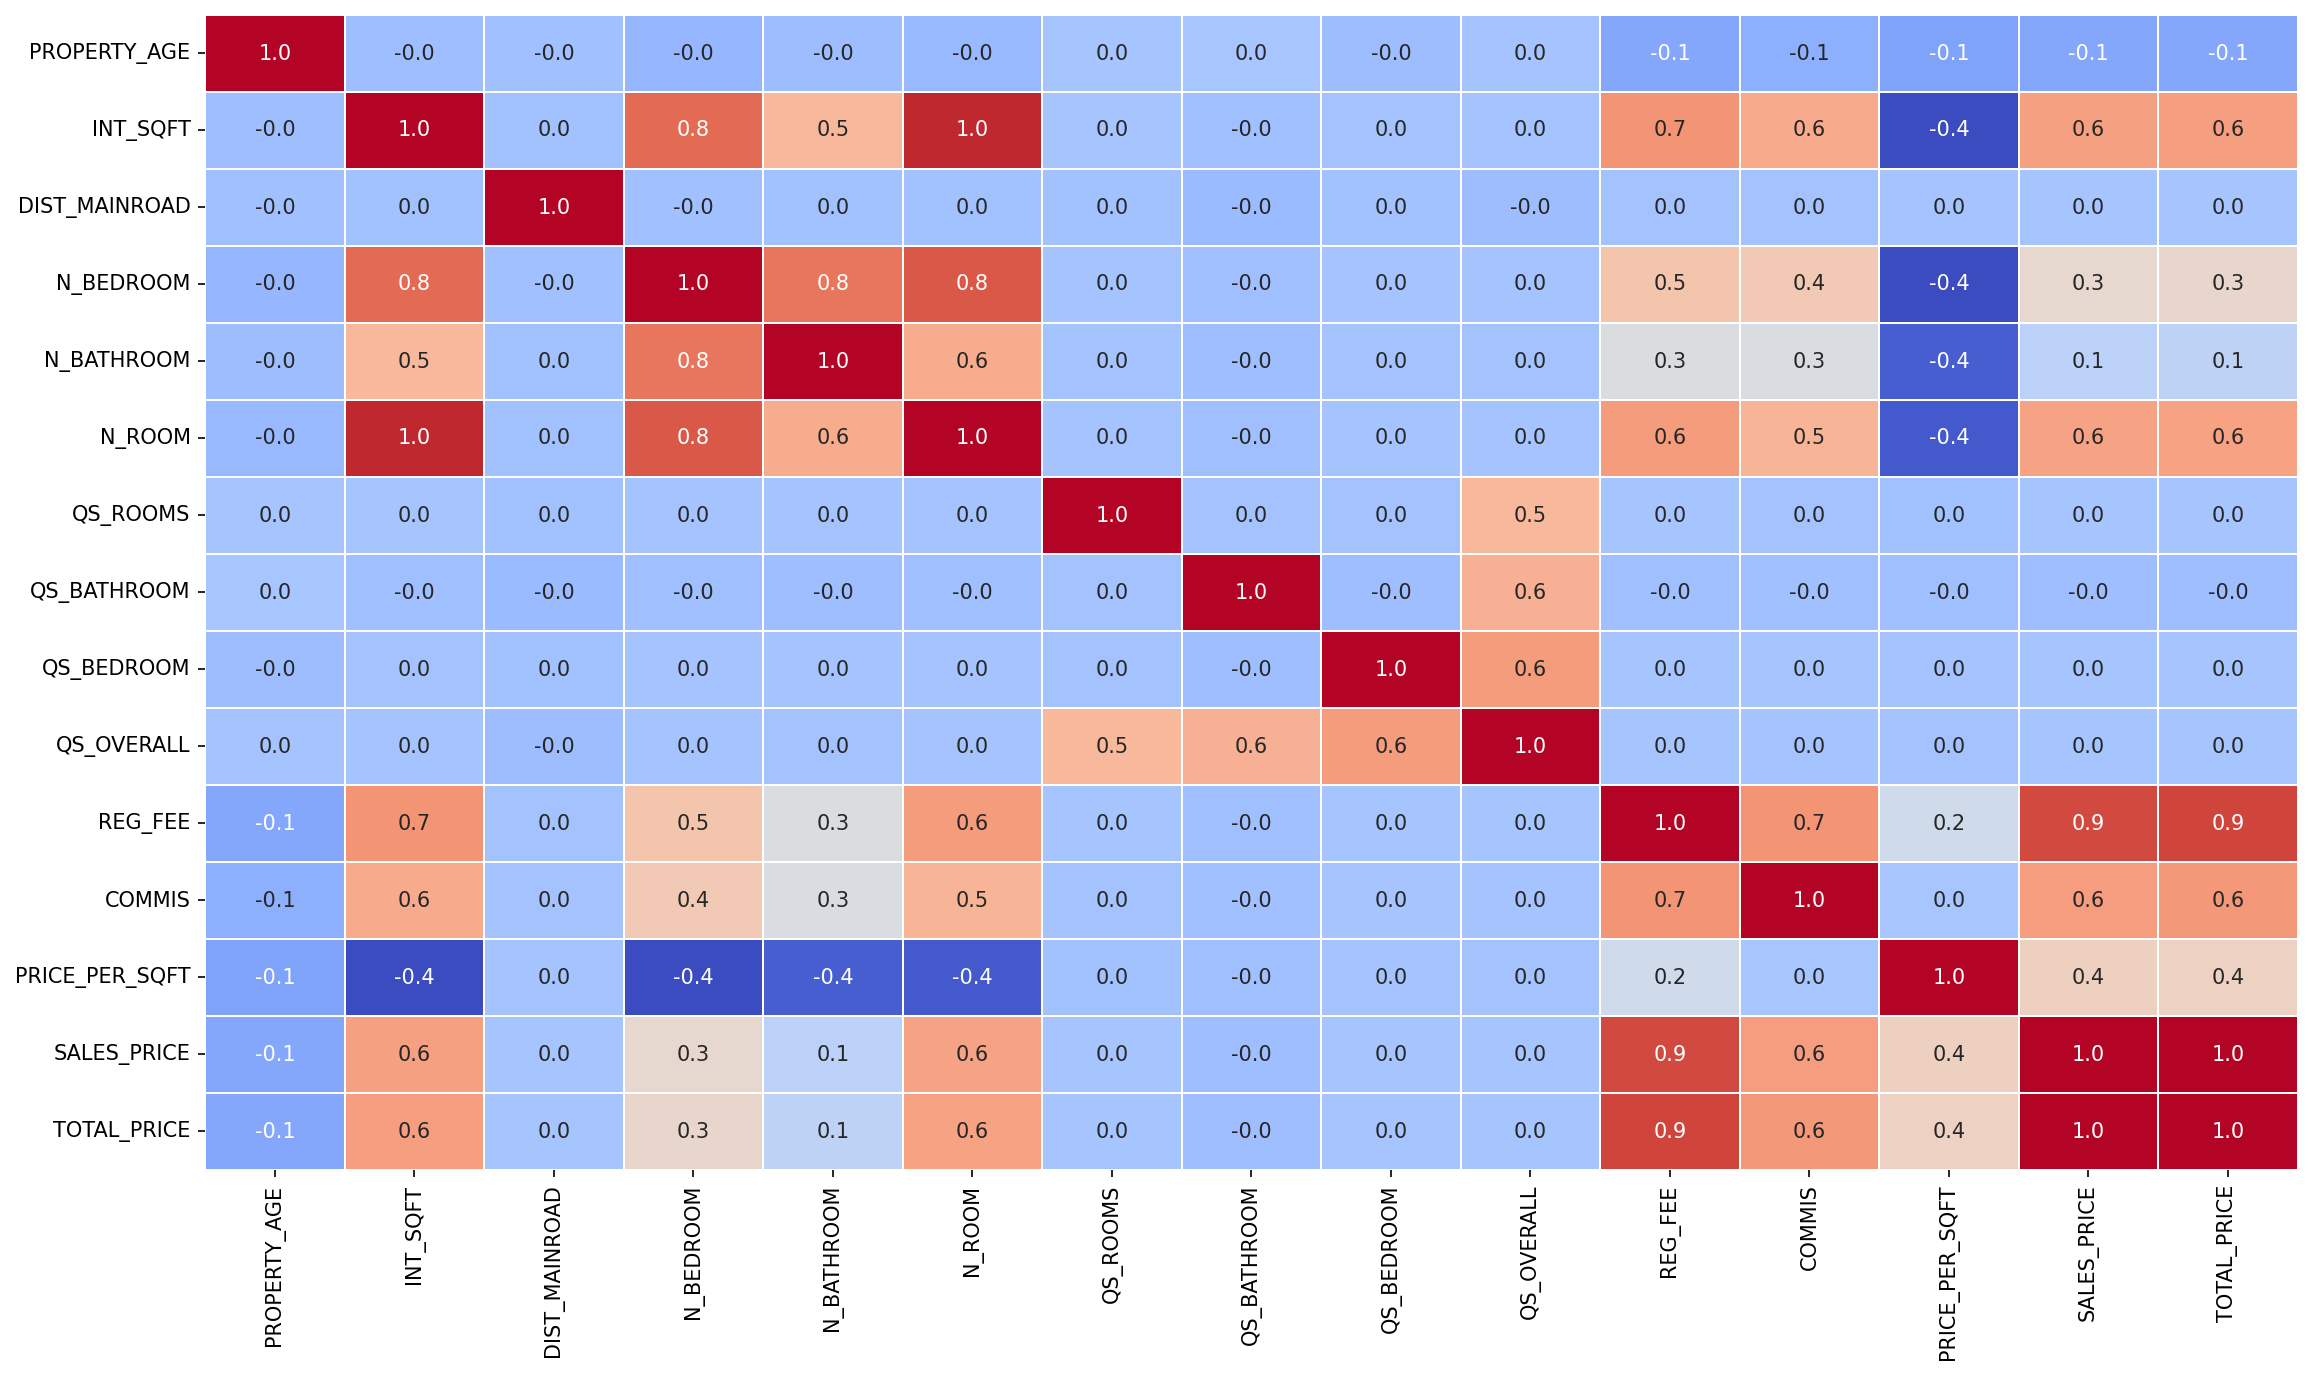

In [47]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df3.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

# 6.Plotting

### plotting the numerical columns with target column to find how strong the relation is..


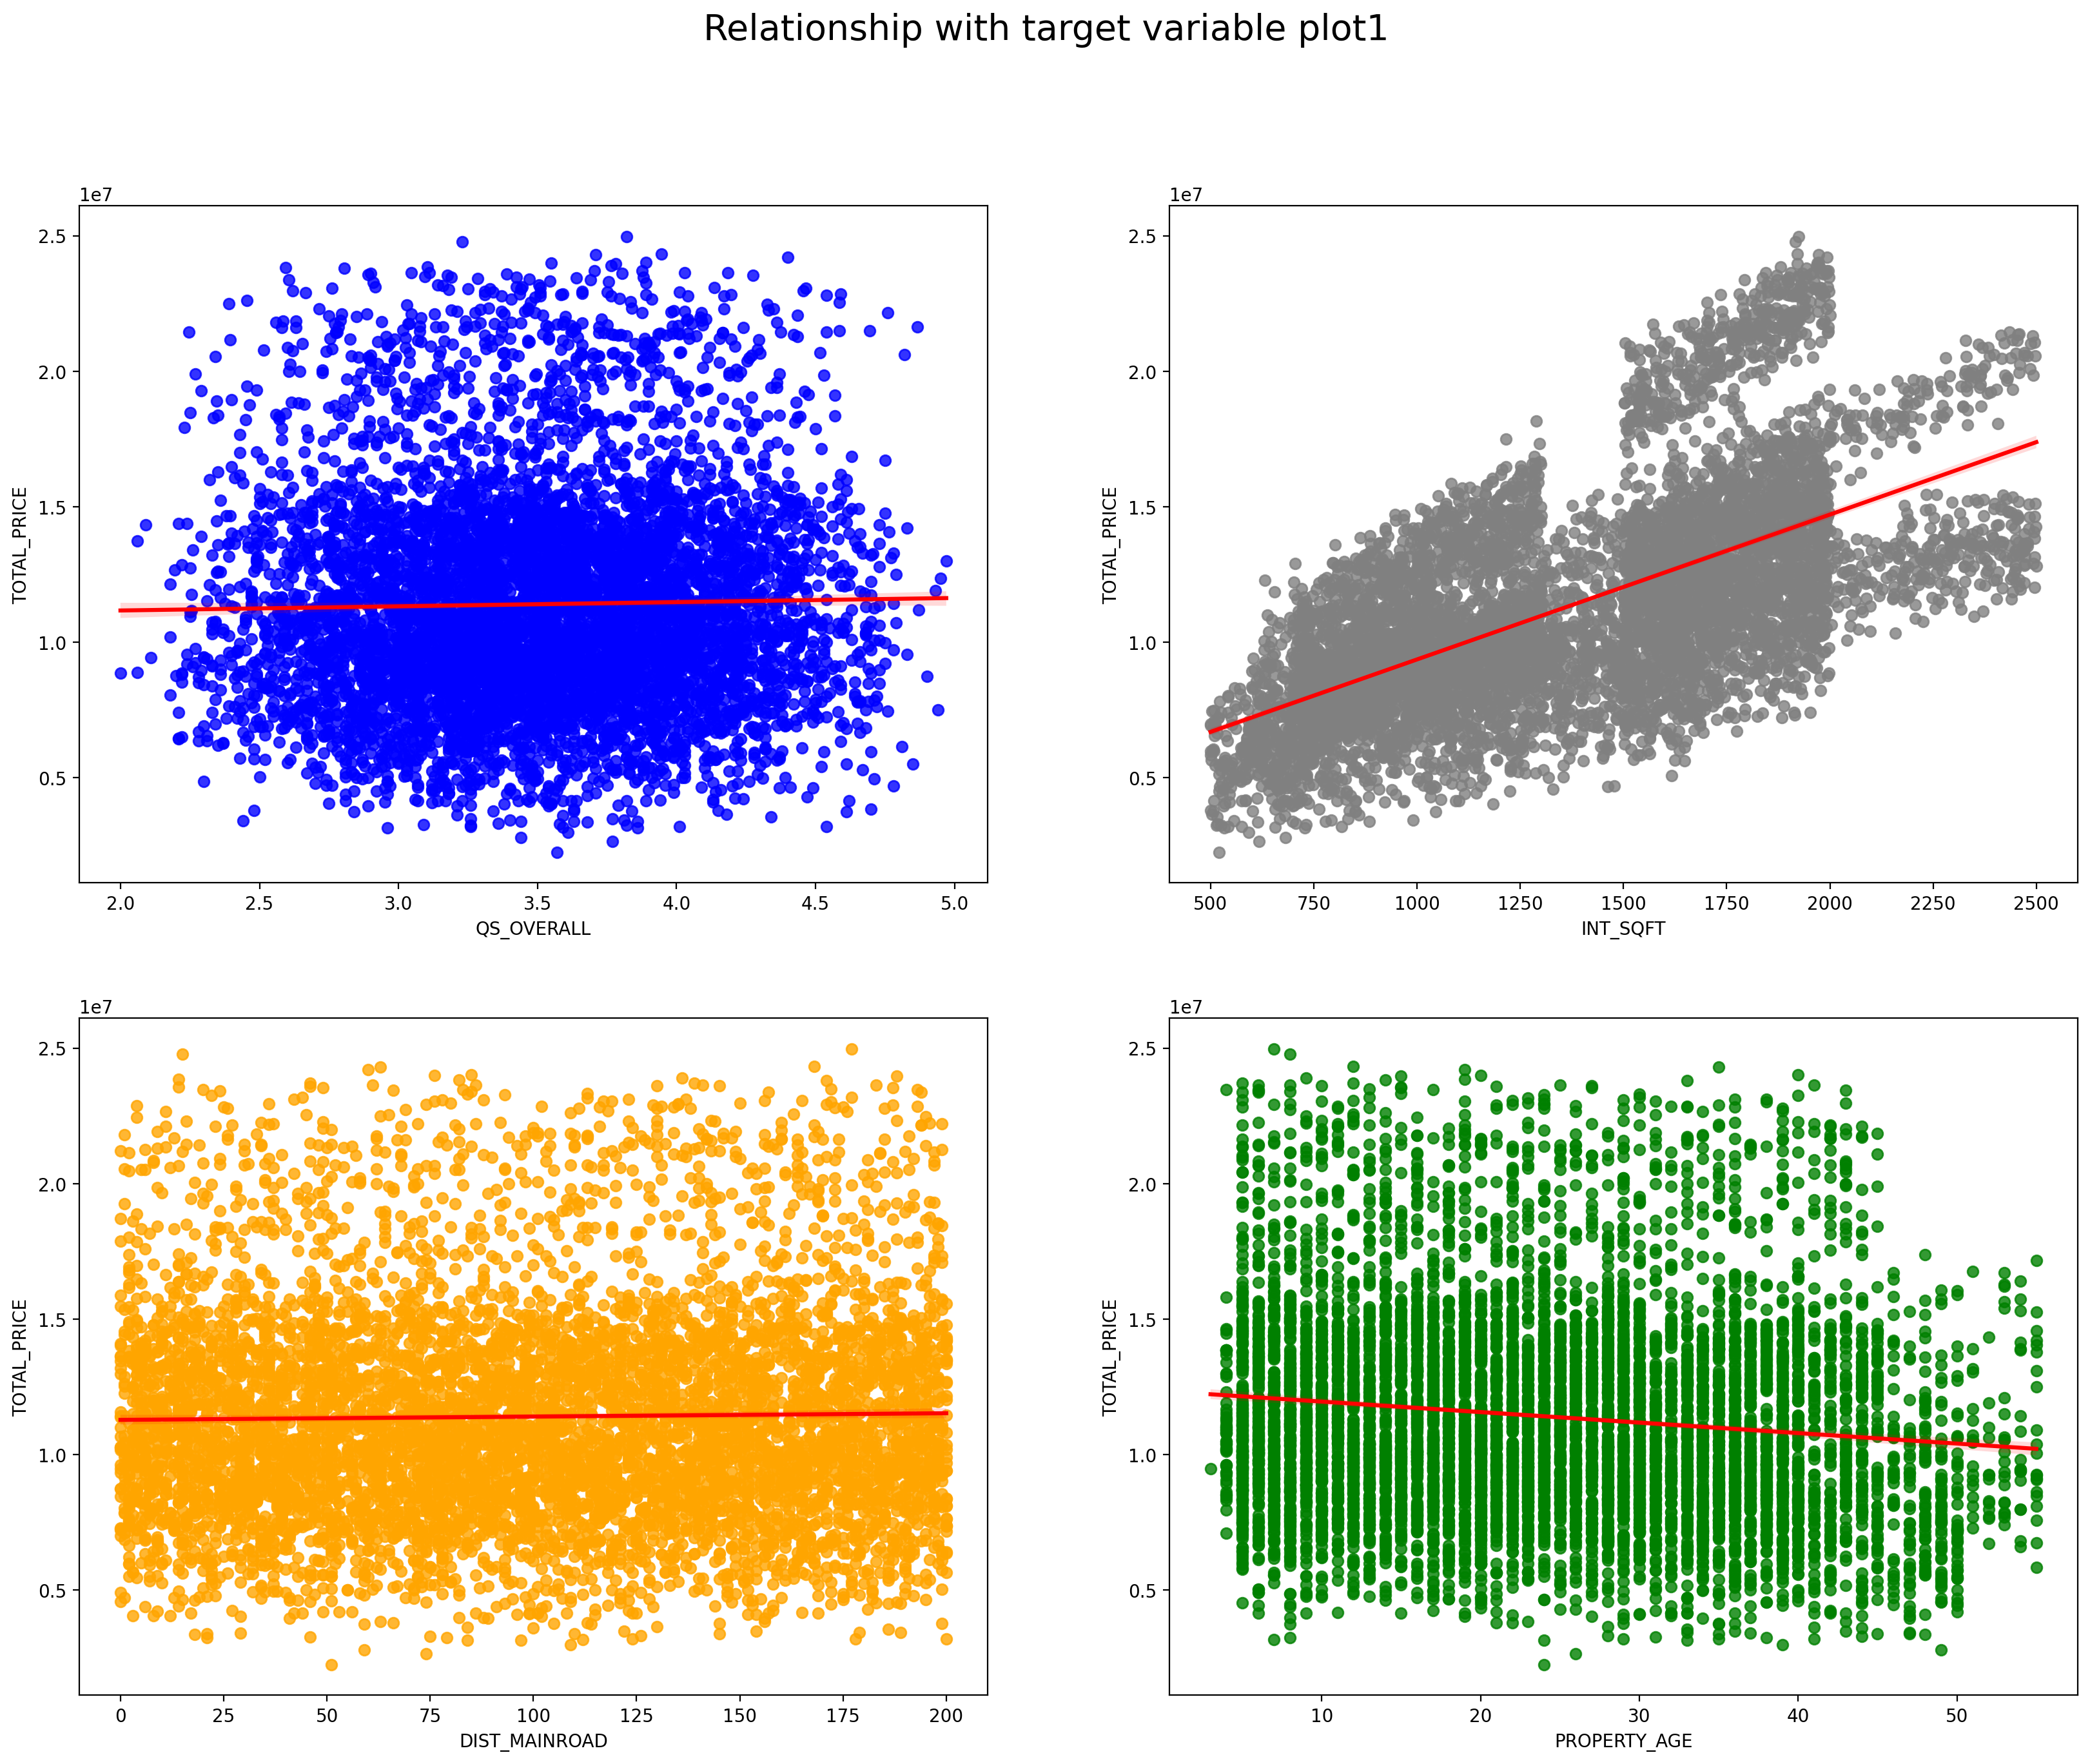

In [48]:
plt.figure(figsize=(20, 15), dpi=200)

plt.subplot(2,2,1)
sns.regplot(df3.QS_OVERALL, df3.TOTAL_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(df3.INT_SQFT, df3.TOTAL_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df3.DIST_MAINROAD, df3.TOTAL_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(df3.PROPERTY_AGE, df3.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.suptitle("Relationship with target variable plot1",fontsize=20)
plt.show()


### summary:

##### By referring to the regressionplot above we can make some decisions..

#### 1.In qs_overall we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
#### 2.In int_sqft we find good relation so this feature will be very important for us so we will keep it.
#### 3.In dist_mainroad we didn't find any relation so this feature will be of no use or very less us for us so we will drop it
#### 4.In property_age we find small relation so this feature will be useful for us so we will keep it.

In [49]:
#plotting the discrete values with target columns

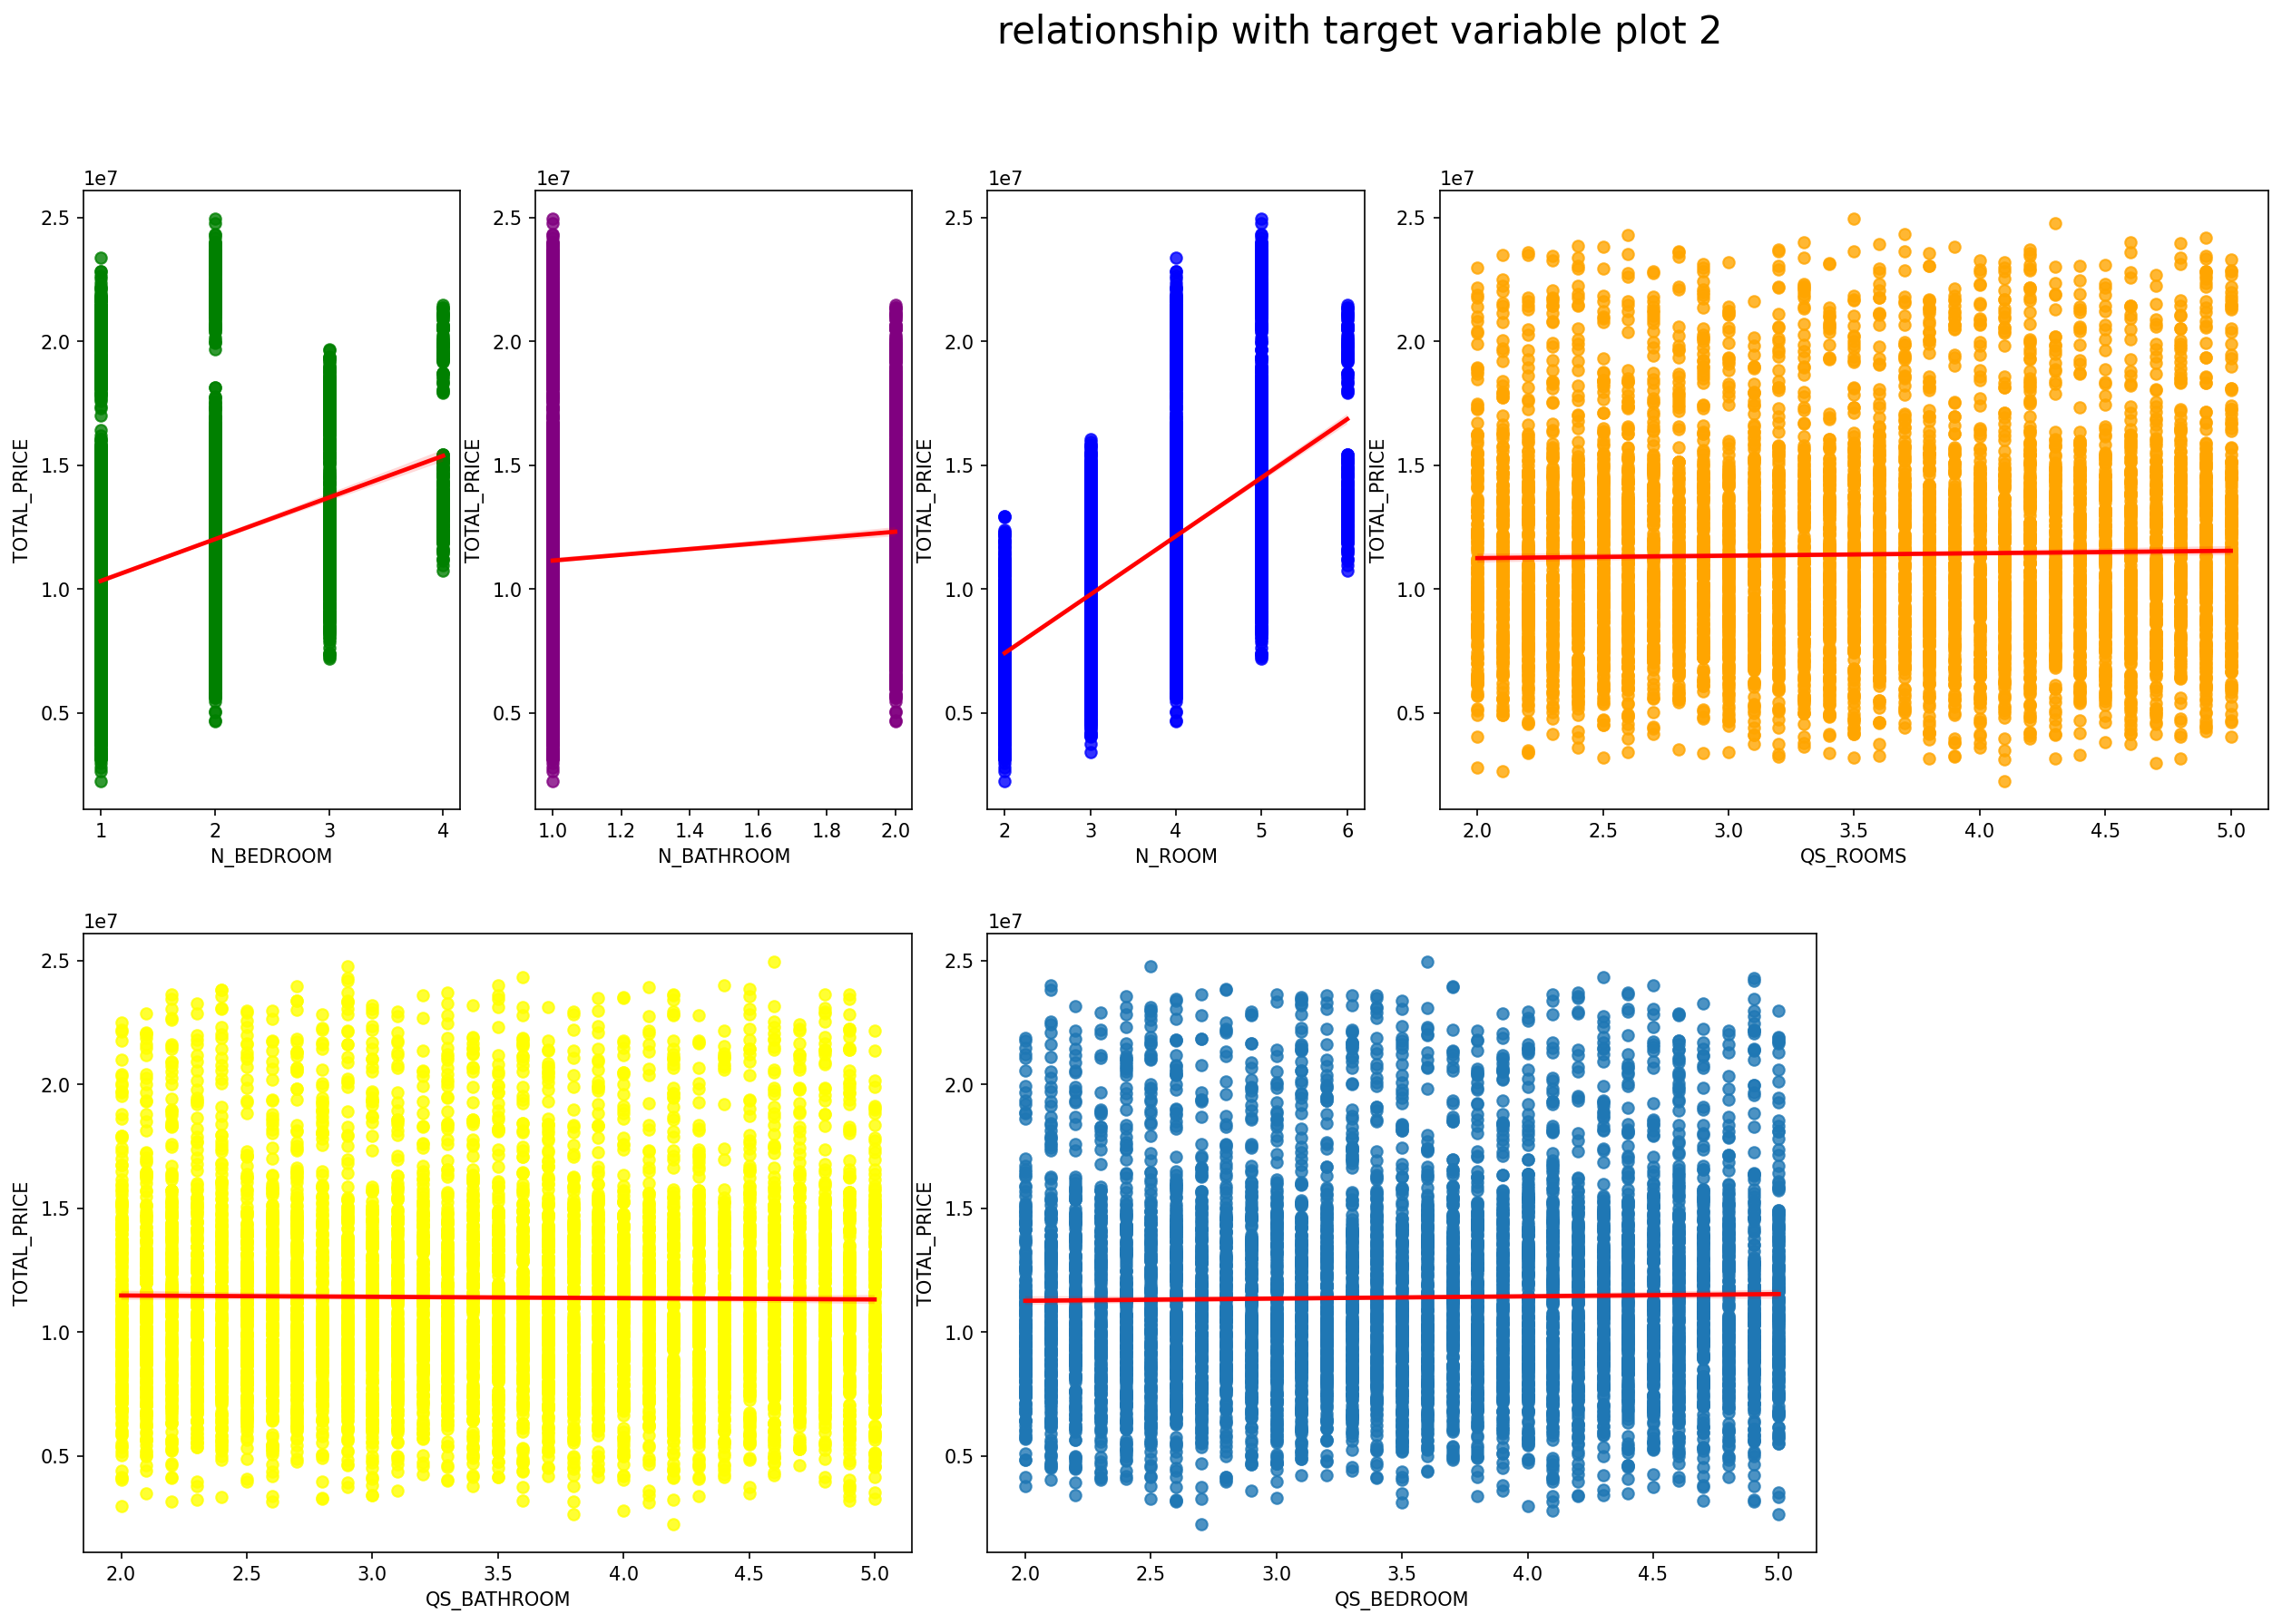

In [50]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(df3.N_BEDROOM, df3.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(df3.N_BATHROOM, df3.TOTAL_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(df3.N_ROOM, df3.TOTAL_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(df3.QS_ROOMS, df3.TOTAL_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(df3.QS_BATHROOM, df3.TOTAL_PRICE, scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(df3.QS_BEDROOM, df3.TOTAL_PRICE, line_kws={"color": "red"})

plt.suptitle("relationship with target variable plot 2", fontsize=20)
plt.show()

### summary:-

#### Here we can come to conclusion that:

###### 1. In n_bedroom we find good relation so this feature will be very important for us so we will hold on to it.
###### 2. In n_bathroom we find small relation so this feature will be useful for us so we will hold on to it.
###### 3. In n_room we find good relation so this feature will be very important for us so we will hold on to it.
###### 4. In qs_rooms we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
###### 5. In qs_bathroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
###### 6. In qs_bedroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

### plotting commis and reg_fee with target column

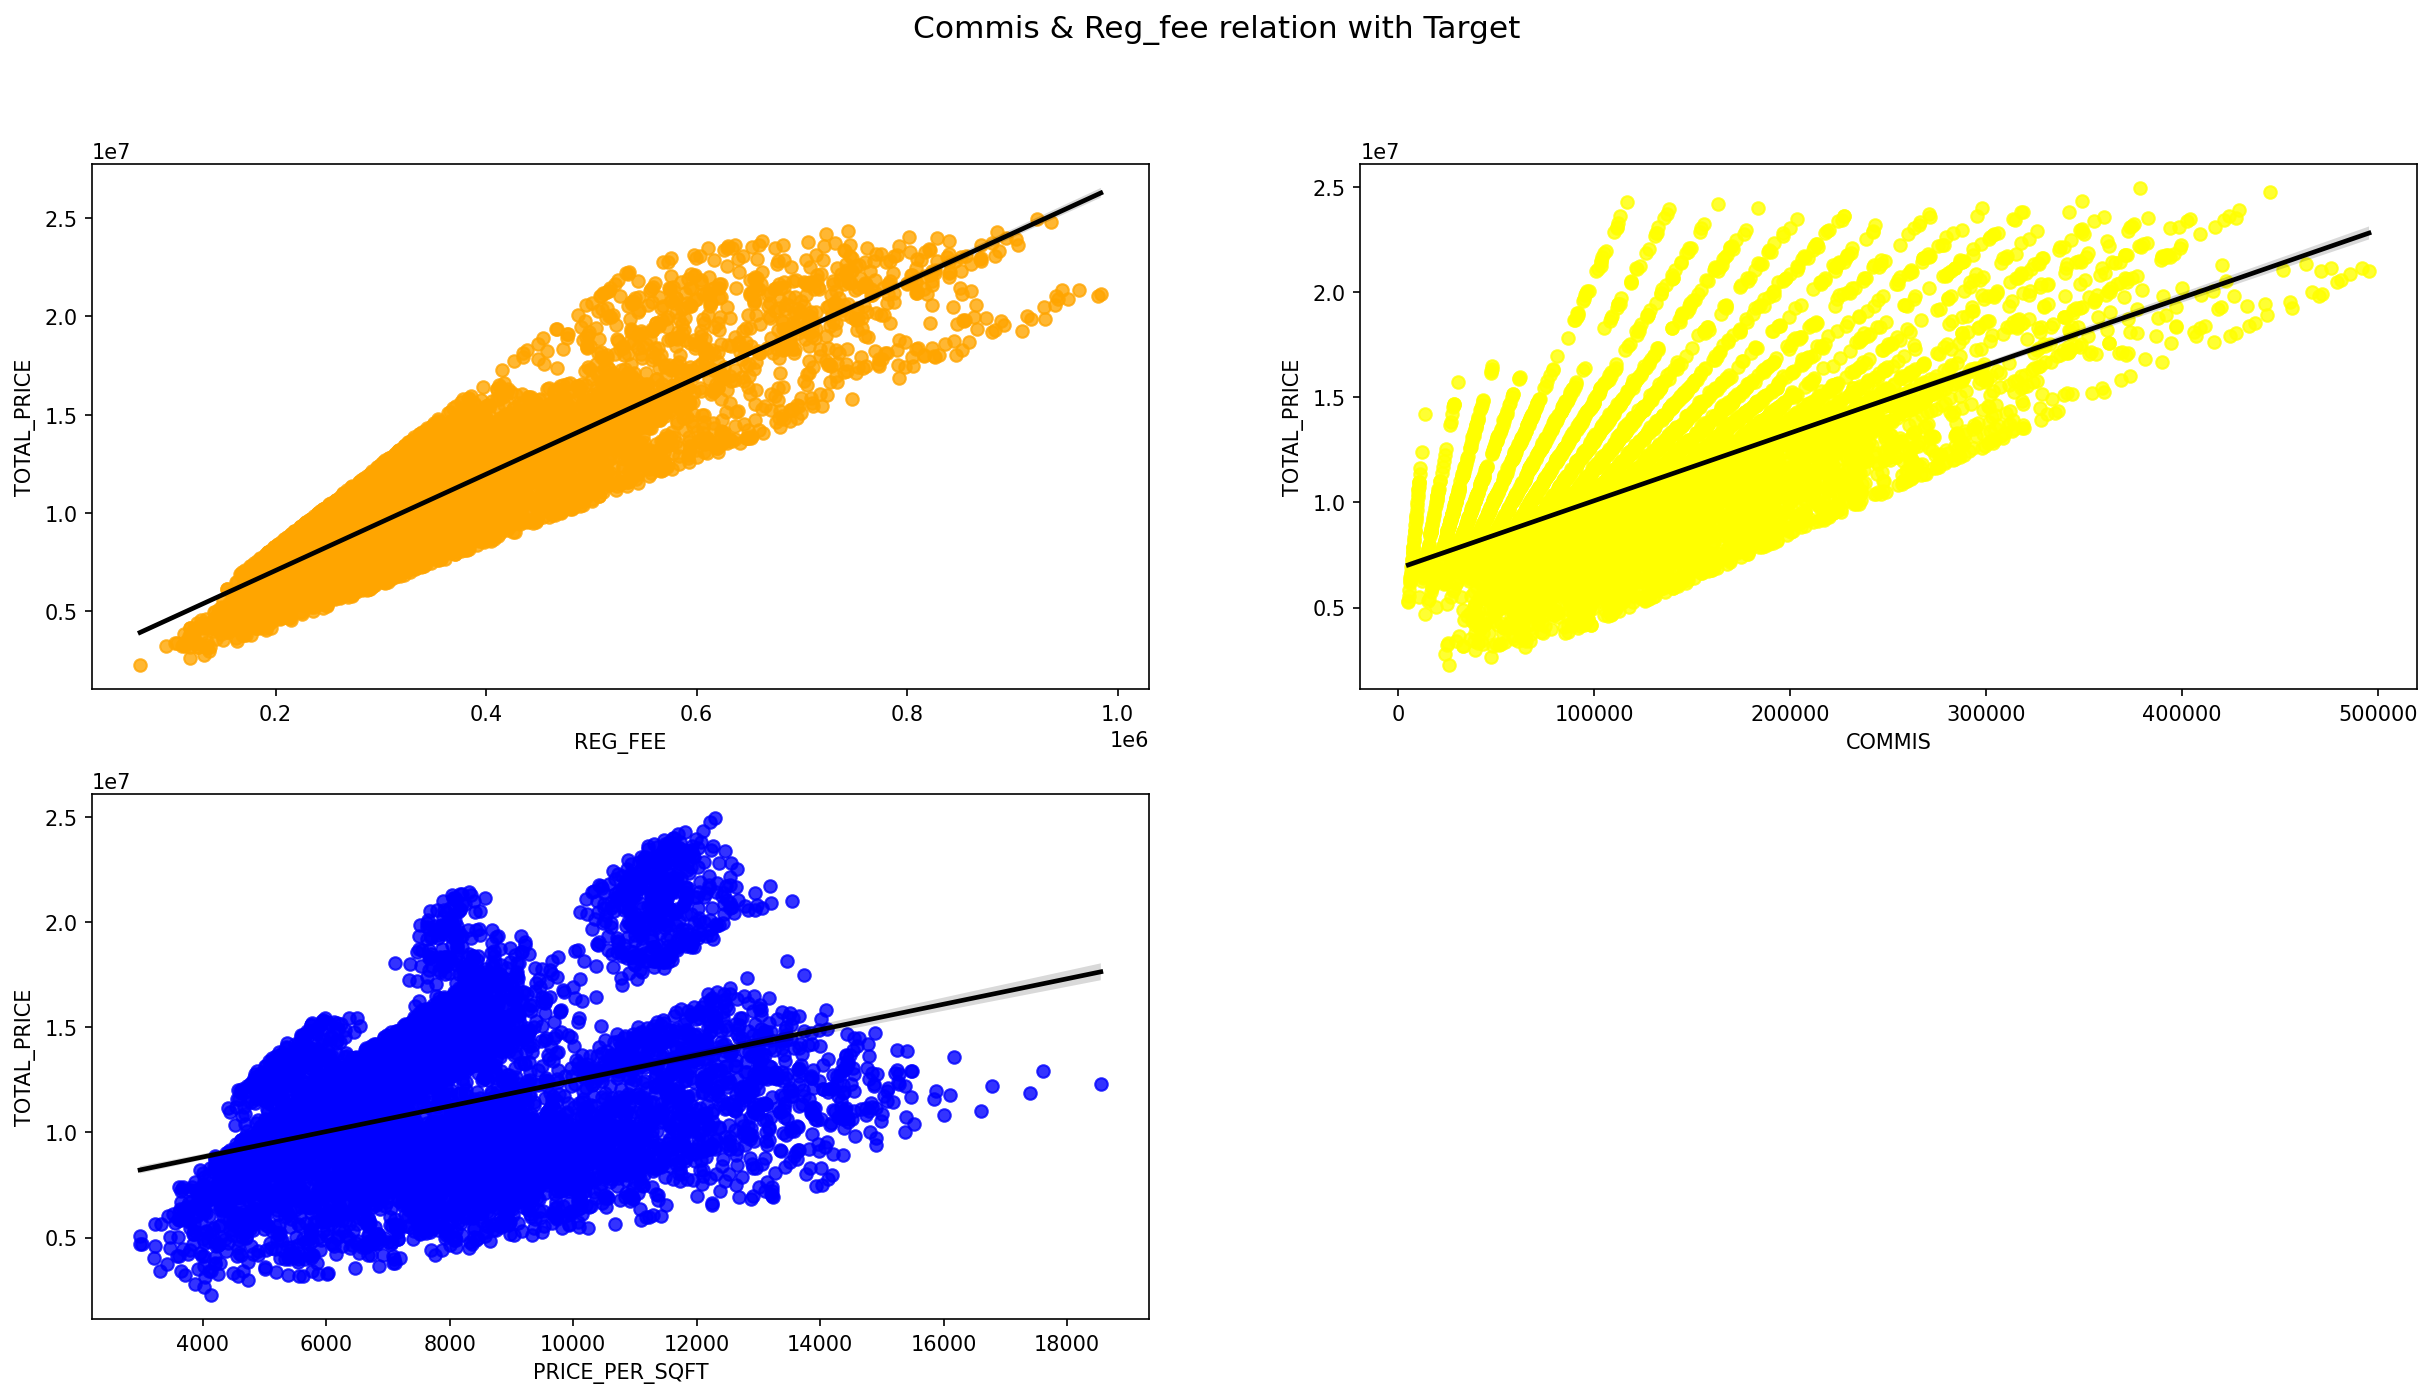

In [51]:
# we are clearv that these 2 columns are completly dependent on the target column
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(df3.REG_FEE, df3.TOTAL_PRICE,scatter_kws={"color": "orange"},line_kws={"color": "black"})
plt.subplot(2,2,2)
sns.regplot(df3.COMMIS, df3.TOTAL_PRICE,scatter_kws={"color": "yellow"}, line_kws={"color": "black"})
plt.subplot(2,2,3)
sns.regplot(df3.PRICE_PER_SQFT, df3.TOTAL_PRICE,scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.suptitle("Commis & Reg_fee relation with Target", fontsize=15)
plt.show()

#####   From the above plot we can understand that they have high relationship with the target so we will hold on to the column

### Plotting categorical column with target 

In [52]:
fig = px.bar(df3, x="AREA",y="SALES_PRICE",color="AREA")
fig.show()

In [53]:
df3.AREA.value_counts()

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64

### 1. By seeing the bar plot above it is clear that chrompet has the highest sale in terms of total count and price.

In [54]:
fig = px.scatter(df3, x="INT_SQFT", y="SALES_PRICE", color="AREA")
fig.show()

#### 1.  It is clear that kk nagar has the highest in terms of SQFT.
#### 2.  Tnagar and Anna nagar has the highest sales_price though it is lesser SQFT than kk nagar.


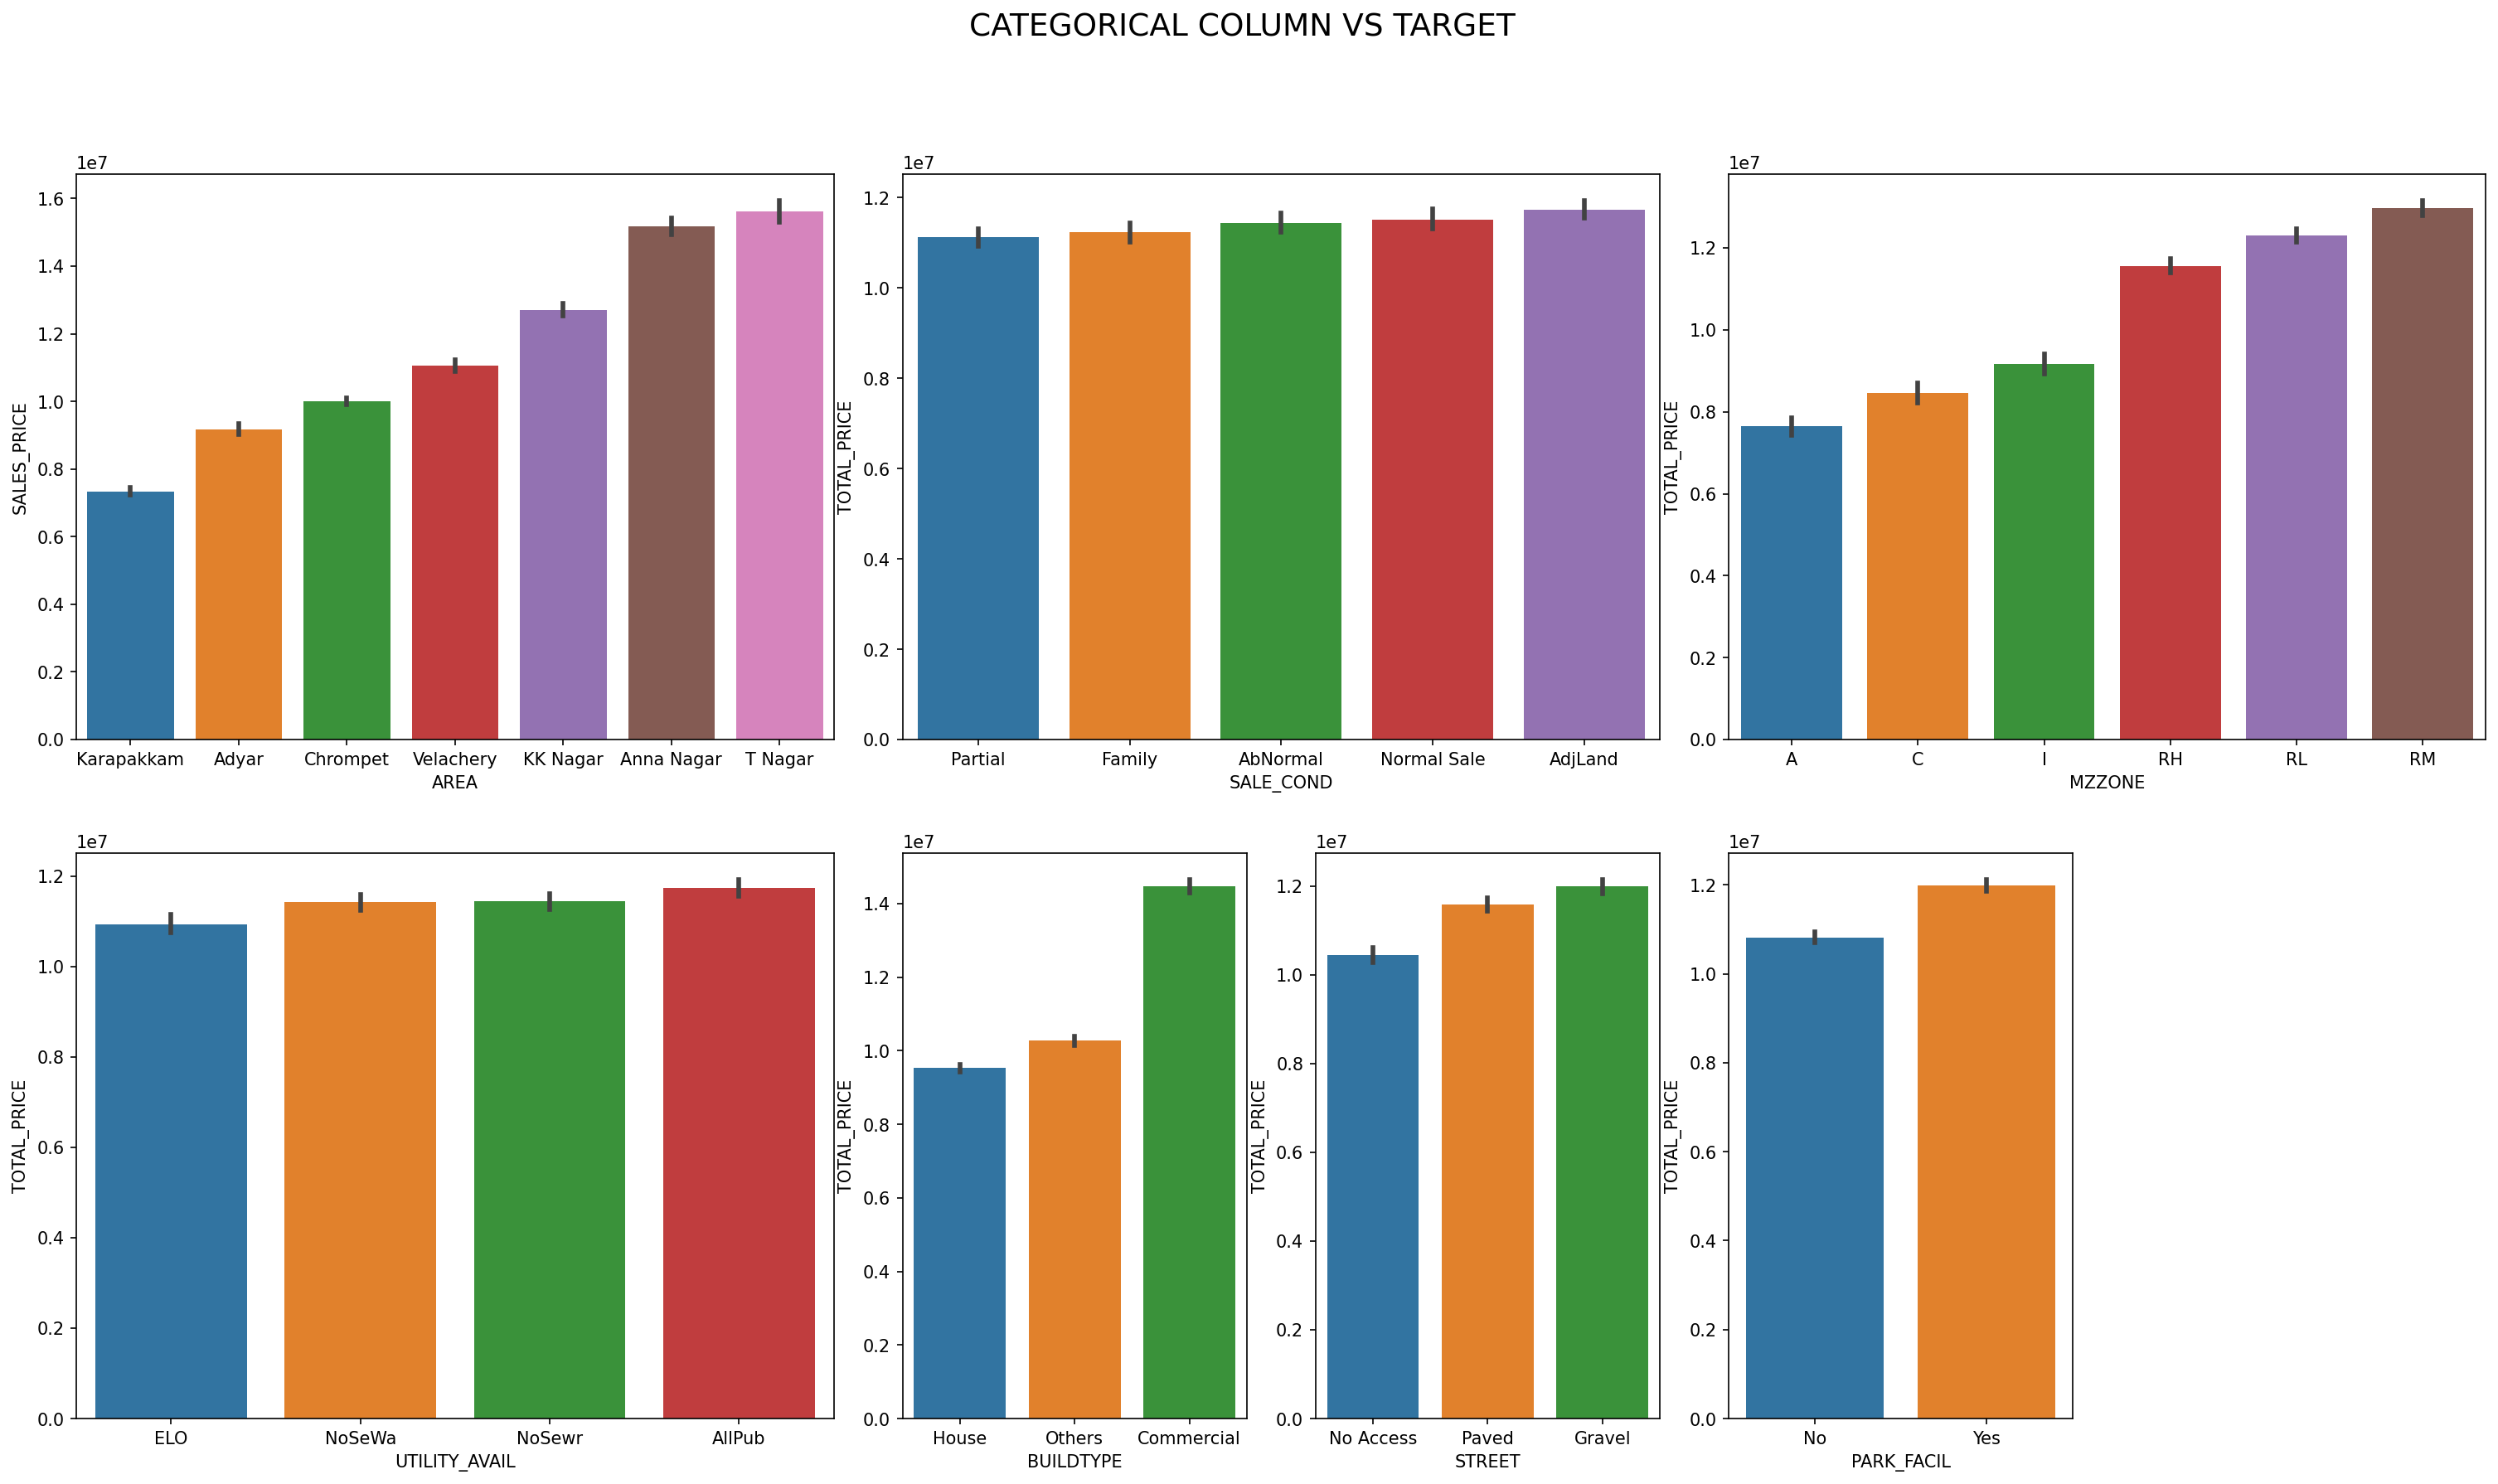

In [55]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=df3["AREA"],y=df3["SALES_PRICE"],order= df3.groupby(["AREA"])["SALES_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=df3["SALE_COND"],y=df3["TOTAL_PRICE"],order= df3.groupby(["SALE_COND"])["TOTAL_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=df3["MZZONE"],y=df3["TOTAL_PRICE"],order= df3.groupby(["MZZONE"])["TOTAL_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=df3["UTILITY_AVAIL"],y=df3["TOTAL_PRICE"],order= df3.groupby(["UTILITY_AVAIL"])["TOTAL_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=df3["BUILDTYPE"],y=df3["TOTAL_PRICE"],order= df3.groupby(["BUILDTYPE"])["TOTAL_PRICE"].mean().sort_values().index)
plt.subplot2grid((2,6),(1,3))
sns.barplot(x=df3["STREET"],y=df3["TOTAL_PRICE"],order= df3.groupby(["STREET"])["TOTAL_PRICE"].mean().sort_values().index)

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=df3["PARK_FACIL"],y=df3["TOTAL_PRICE"],order= df3.groupby(["PARK_FACIL"])["TOTAL_PRICE"].mean().sort_values().index)

plt.suptitle("CATEGORICAL COLUMN VS TARGET", fontsize=18)
plt.show()


#### SUMMARY
##### By referring the above plots we can make certain decisions

###### 1. In area when we sort column in respect of total_price we find good relation so we need the column and do label encoding.
###### 2.  In sale_cond when we sort column in respect of total_price we find good relation so we need the column and do label encoding.
###### 3.In mzzone when we sort column in respect of total_price we find good relation so we need the column and do label encoding.
###### 4. In utility_avain when we sort column in respect of total_price we find good relation so we need the column and do label encoding.
###### 5.In buildtype when we sort column in respect of total_price we didnt find linear relation in this categorical feature but it may be important for us so we will keep it and do OneHotEncoding on this column
###### 6. In street when we sort column in respect of total_price we find good relation linearso we need the column and do label encoding.
###### 7.  In park_facil when we sort column in respect of total_price we find good relation so we need the column and do label encoding.

# 7. Encoding

In [56]:
df3.head(3)

AREA SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  \
0  Karapakkam  AbNormal        Yes  Commercial        AllPub   Paved      A   
1  Anna Nagar  AbNormal         No  Commercial        AllPub  Gravel     RH   
2       Adyar  AbNormal        Yes  Commercial           ELO  Gravel     RL   

   PROPERTY_AGE  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0            44      1004            131          1           1       3   
1            11      1986             26          2           1       5   
2            20       909             70          1           1       3   

   QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0       4.0          3.9         4.9       4.330   380000  144400   
1       4.9          4.2         2.5       3.765   760122  304049   
2       4.1          3.8         2.2       3.090   421094   92114   

   PRICE_PER_SQFT  SALES_PRICE  TOTAL_PRICE  
0         7569.72      7600000      8124400  
1        10935.43     21717770     22781941  
2        14476.57     13159200     13672408

In [57]:
df3["AREA"].shape

(7056,)

In [58]:
df3.isnull().sum()

AREA              0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
PROPERTY_AGE      0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL        0
REG_FEE           0
COMMIS            0
PRICE_PER_SQFT    0
SALES_PRICE       0
TOTAL_PRICE       0
dtype: int64

In [59]:
j=pd.get_dummies(df3.BUILDTYPE,prefix="buildtype")


In [60]:
#j.reset_index(drop=True,inplace=True)

In [61]:
# df3.reset_index(drop=True,inplace=True)
# j.index=df3.index

In [62]:
df4=pd.concat([df3,j],axis=1)


### we will use LabelEncoder from sklearn to transform our categorical column 

In [63]:
# le1=LabelEncoder()
# le2=LabelEncoder()
# le3=LabelEncoder()
# le4=LabelEncoder()
# le5=LabelEncoder()
# le6=LabelEncoder()
# df4["PARK_FACIL"]=le1.fit_transform(df4["PARK_FACIL"])
# df4["AREA"]=le2.fit_transform(df4["AREA"])
# df4["SALE_COND"]=le3.fit_transform(df4["SALE_COND"])
# df4["UTILITY_AVAIL"]=le5.fit_transform(df4["UTILITY_AVAIL"])
# df4["STREET"]=le6.fit_transform(df4["STREET"])

In [64]:
#Encoding the area column order-wise 
df4.AREA = df4.AREA.map({'Karapakkam': 1,
                           'Adyar': 2, 
                           'Chrompet' : 3,
                           'Velachery' : 4,
                           'KK Nagar' : 5, 
                           'Anna Nagar' : 6,
                           'T Nagar' : 7})

# Encoding the sale_cond column order-wise 
df4.SALE_COND = df4.SALE_COND.map({'Partial' : 1, 
                                     'Family' : 2, 
                                     'AbNormal' : 3, 
                                     'Normal Sale' : 4,
                                     'AdjLand' : 5})

# Encoding the park_facil column order-wise 
df4.PARK_FACIL = df4.PARK_FACIL.map({'Yes':1,
                                       'No':0})

# Encoding the utility_avail column order-wise 
df4.UTILITY_AVAIL = df4.UTILITY_AVAIL.map({'ELO' : 1, 
                                             'NoSeWa' : 2,
                                             'NoSewr' : 3,
                                               'AllPub' : 4})
                                          
# Encoding the street column order-wise 
df4.STREET = df4.STREET.map({'No Access' : 1,
                               'Paved' : 2, 
                               'Gravel' : 3})


# Encoding the mzzone column order-wise 
df4.MZZONE = df4.MZZONE.map({'A' : 1,
                               'C' : 2,
                               'I' : 3,
                               'RL' : 5,
                               'RH' : 4,
                               'RM' : 6})

In [65]:
U = ['area', 'sale_cond', 'park_facil',
       'buildtype_Commercial', 'buildtype_House','buildtype_Others', 'utility_avail',
        'street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
        'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
         'qs_overall', 'reg_fee', 'commis',"price_per_sqft" ,'sales_price', 'total_price']

In [66]:
df4.columns=df4.columns.str.upper()
df4.columns

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'PROPERTY_AGE', 'INT_SQFT', 'DIST_MAINROAD',
       'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'PRICE_PER_SQFT',
       'SALES_PRICE', 'TOTAL_PRICE', 'BUILDTYPE_COMMERCIAL', 'BUILDTYPE_HOUSE',
       'BUILDTYPE_OTHERS'],
      dtype='object')

In [67]:
g = []
for i in U:
    o=i.upper()
    g.append(o)
  

In [68]:
df4 = df4.reindex(columns = g)

In [69]:
df4.isnull().sum()

AREA                    0
SALE_COND               0
PARK_FACIL              0
BUILDTYPE_COMMERCIAL    0
BUILDTYPE_HOUSE         0
BUILDTYPE_OTHERS        0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
PROPERTY_AGE            0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
REG_FEE                 0
COMMIS                  0
PRICE_PER_SQFT          0
SALES_PRICE             0
TOTAL_PRICE             0
dtype: int64

In [70]:
df4.PARK_FACIL=df4.PARK_FACIL.astype('int64')# changing dtype to integer

In [71]:
df4.head(3)

AREA  SALE_COND  PARK_FACIL  BUILDTYPE_COMMERCIAL  BUILDTYPE_HOUSE  \
0     1          3           1                     1                0   
1     6          3           0                     1                0   
2     2          3           1                     1                0   

   BUILDTYPE_OTHERS  UTILITY_AVAIL  STREET  MZZONE  PROPERTY_AGE  INT_SQFT  \
0                 0              4       2       1            44      1004   
1                 0              4       3       4            11      1986   
2                 0              1       3       5            20       909   

   DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  QS_BATHROOM  \
0            131          1           1       3       4.0          3.9   
1             26          2           1       5       4.9          4.2   
2             70          1           1       3       4.1          3.8   

   QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  PRICE_PER_SQFT  SALES_PRICE  \
0         4.9       4.330   380000  144400         7569.72      7600000   
1         2.5       3.765   760122  304049        10935.43     21717770   
2         2.2       3.090   421094   92114        14476.57     13159200   

   TOTAL_PRICE  
0      8124400  
1     22781941  
2     13672408

In [72]:
df4.dtypes # verifying the dtypes 

AREA                      int64
SALE_COND                 int64
PARK_FACIL                int64
BUILDTYPE_COMMERCIAL      uint8
BUILDTYPE_HOUSE           uint8
BUILDTYPE_OTHERS          uint8
UTILITY_AVAIL             int64
STREET                    int64
MZZONE                    int64
PROPERTY_AGE              int64
INT_SQFT                  int64
DIST_MAINROAD             int64
N_BEDROOM                 int32
N_BATHROOM                int32
N_ROOM                    int64
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
PRICE_PER_SQFT          float64
SALES_PRICE               int64
TOTAL_PRICE               int64
dtype: object

# By using pandas get_dummies func we created 3 dummy columns . 
# In order to avoid dummy trap situation we need to drop any one of those columns

In [73]:
df4=df4.drop("BUILDTYPE_OTHERS",axis=1)

In [74]:
df4.head()

AREA  SALE_COND  PARK_FACIL  BUILDTYPE_COMMERCIAL  BUILDTYPE_HOUSE  \
0     1          3           1                     1                0   
1     6          3           0                     1                0   
2     2          3           1                     1                0   
3     4          2           0                     0                0   
4     1          3           1                     0                0   

   UTILITY_AVAIL  STREET  MZZONE  PROPERTY_AGE  INT_SQFT  DIST_MAINROAD  \
0              4       2       1            44      1004            131   
1              4       3       4            11      1986             26   
2              1       3       5            20       909             70   
3              3       2       3            22      1855             14   
4              4       3       2            30      1226             84   

   N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
0          1           1       3       4.0          3.9         4.9   
1          2           1       5       4.9          4.2         2.5   
2          1           1       3       4.1          3.8         2.2   
3          3           2       5       4.7          3.9         3.6   
4          1           1       3       3.0          2.5         4.1   

   QS_OVERALL  REG_FEE  COMMIS  PRICE_PER_SQFT  SALES_PRICE  TOTAL_PRICE  
0       4.330   380000  144400         7569.72      7600000      8124400  
1       3.765   760122  304049        10935.43     21717770     22781941  
2       3.090   421094   92114        14476.57     13159200     13672408  
3       4.010   356321   77042         5191.53      9630290     10063653  
4       3.290   237000   74063         6040.99      7406250      7717313

# 8.Dropping the columns by considering visualizations

### dropping out the columns which has no impact on the target column

In [75]:
dropout=['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee','commis','sales_price']
drop=[x.upper() for x in dropout]
drop

['QS_OVERALL',
 'DIST_MAINROAD',
 'QS_OVERALL',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'REG_FEE',
 'COMMIS',
 'SALES_PRICE']

In [76]:
# Removing unnecessary features which has no relation with total_price

df=df4.drop(drop, axis=1)

In [77]:
df.head()

AREA  SALE_COND  PARK_FACIL  BUILDTYPE_COMMERCIAL  BUILDTYPE_HOUSE  \
0     1          3           1                     1                0   
1     6          3           0                     1                0   
2     2          3           1                     1                0   
3     4          2           0                     0                0   
4     1          3           1                     0                0   

   UTILITY_AVAIL  STREET  MZZONE  PROPERTY_AGE  INT_SQFT  N_BEDROOM  \
0              4       2       1            44      1004          1   
1              4       3       4            11      1986          2   
2              1       3       5            20       909          1   
3              3       2       3            22      1855          3   
4              4       3       2            30      1226          1   

   N_BATHROOM  N_ROOM  PRICE_PER_SQFT  TOTAL_PRICE  
0           1       3         7569.72      8124400  
1           1       5        10935.43     22781941  
2           1       3        14476.57     13672408  
3           2       5         5191.53     10063653  
4           1       3         6040.99      7717313

In [78]:
df.isnull().sum()

AREA                    0
SALE_COND               0
PARK_FACIL              0
BUILDTYPE_COMMERCIAL    0
BUILDTYPE_HOUSE         0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
PROPERTY_AGE            0
INT_SQFT                0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
PRICE_PER_SQFT          0
TOTAL_PRICE             0
dtype: int64

# 9. Outlier Detection


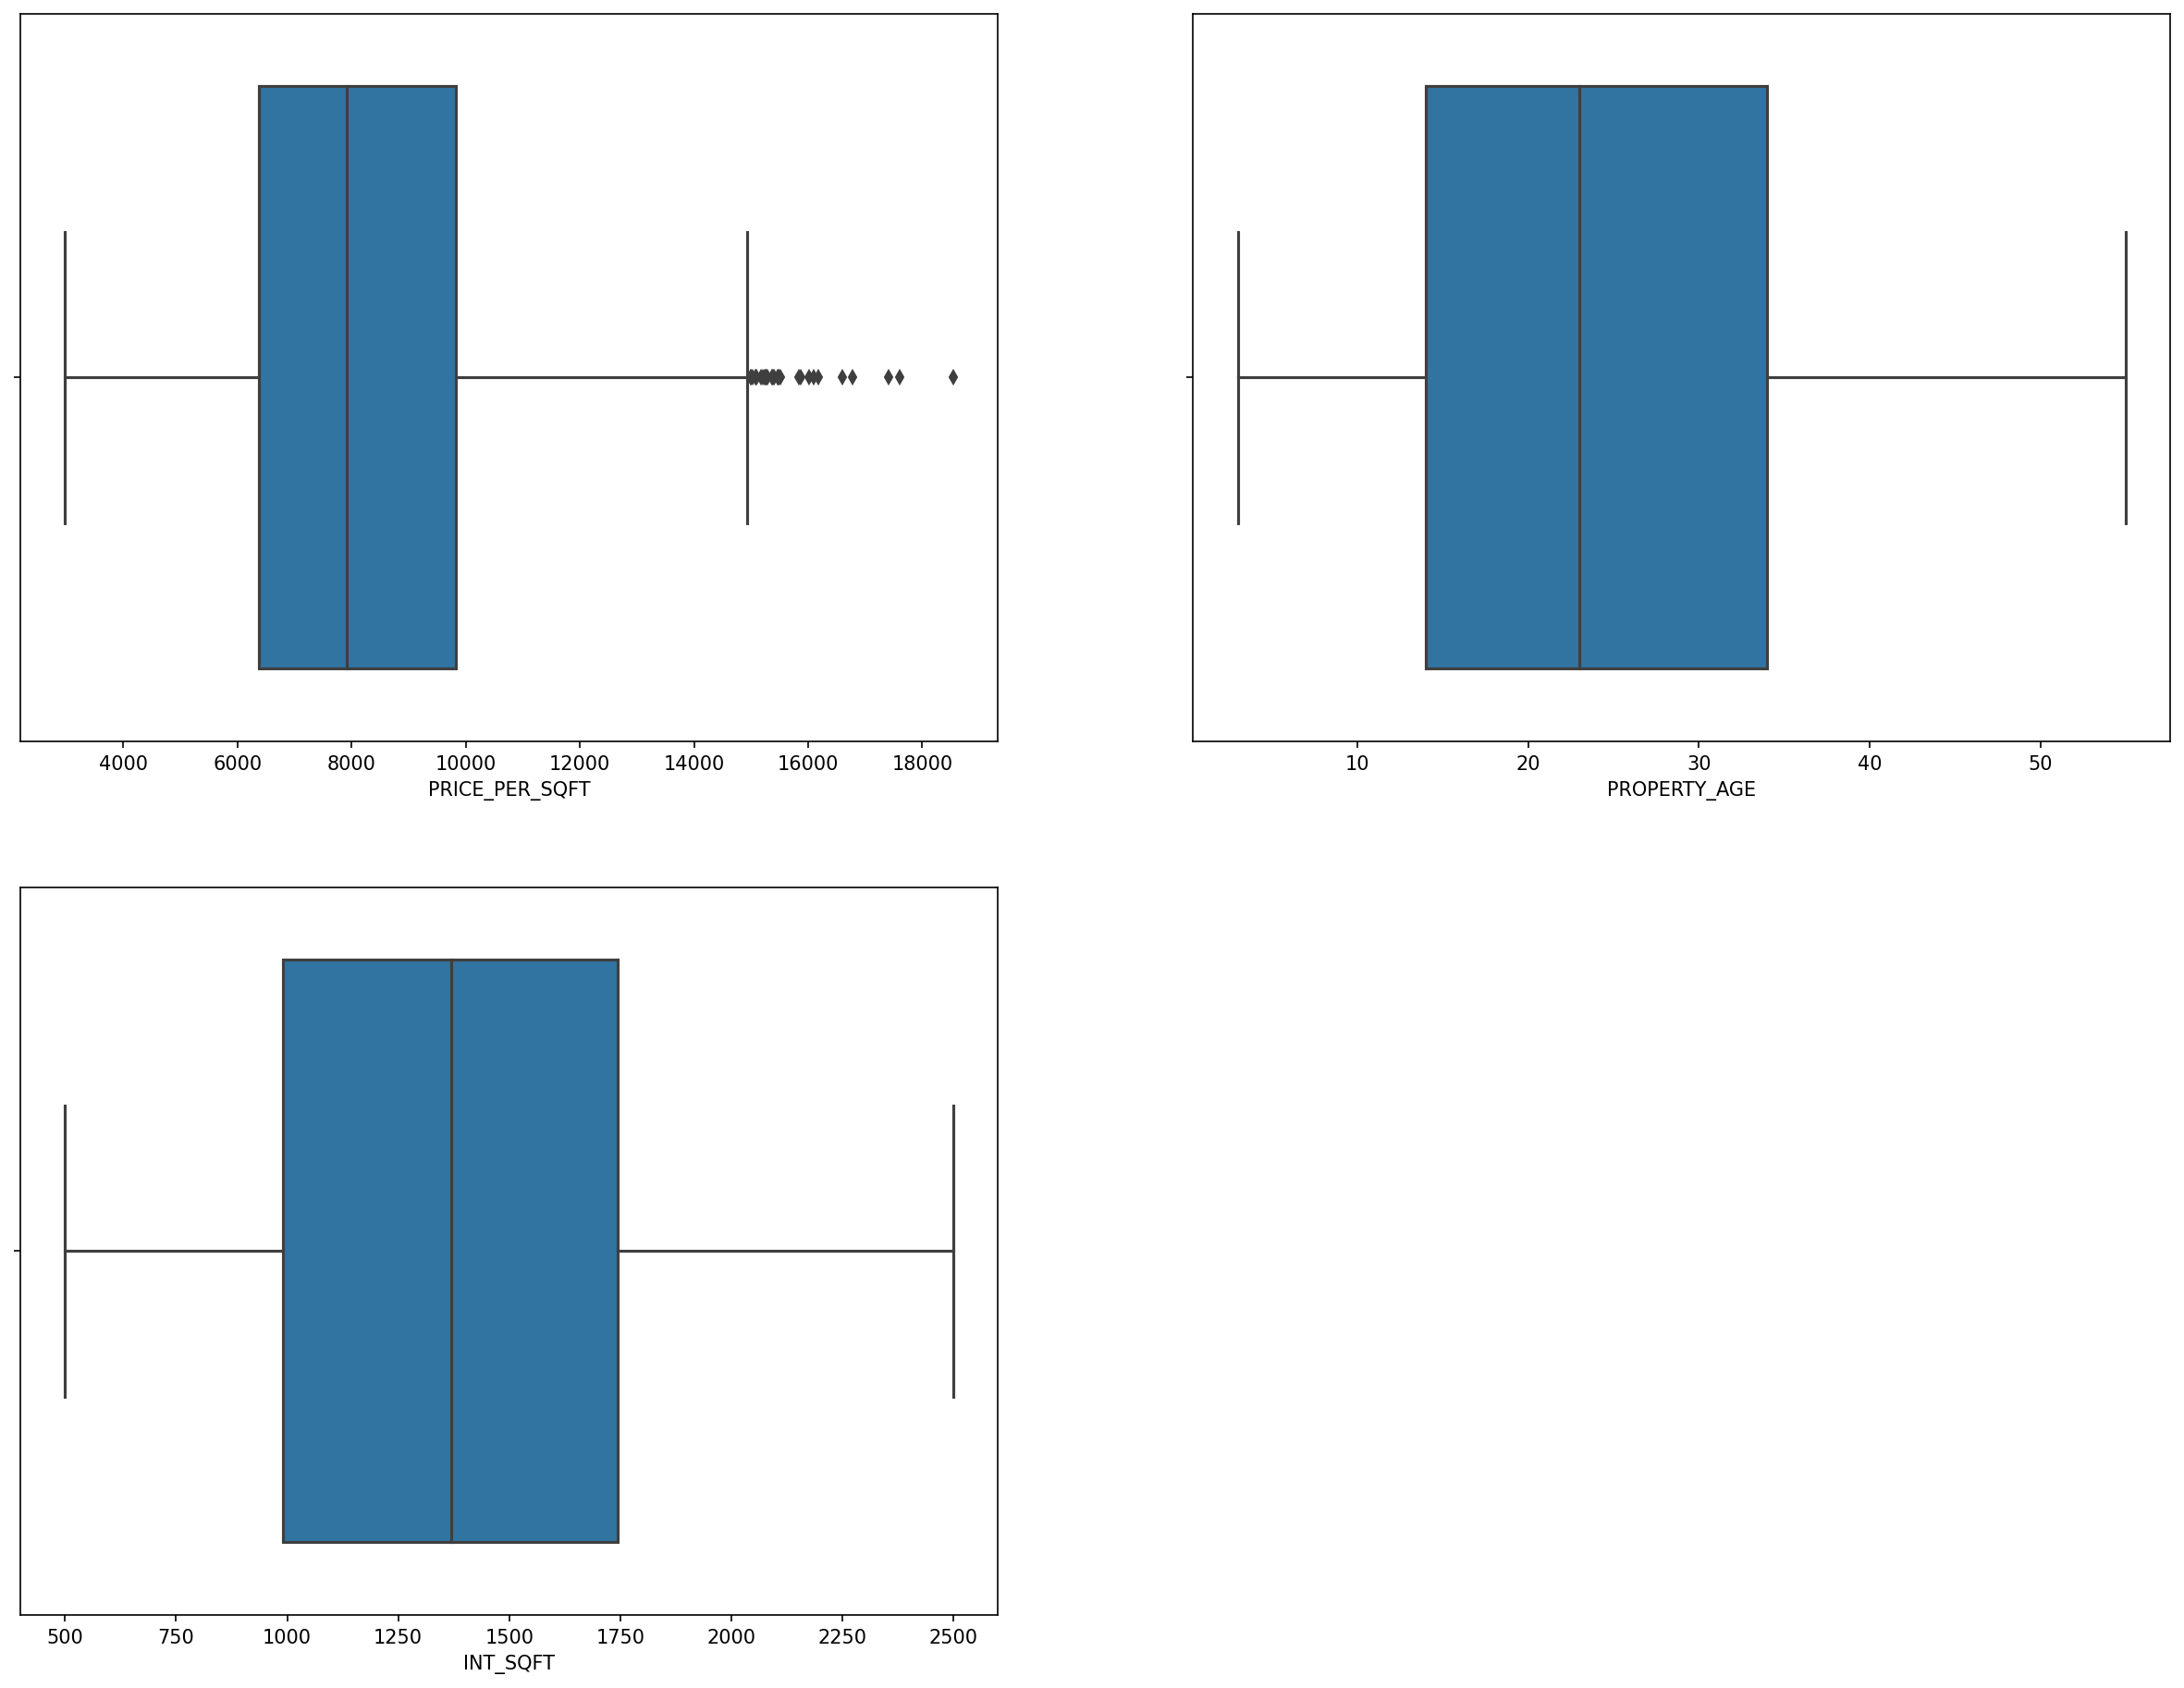

In [79]:
plt.figure(figsize=(20, 15), dpi=150)

plt.subplot(2,2,1)
sns.boxplot(df.PRICE_PER_SQFT)

plt.subplot(2,2,2)
sns.boxplot(df.PROPERTY_AGE)

plt.subplot(2,2,3)
sns.boxplot(df.INT_SQFT)

plt.show()

### By using the box plot we found so many outliers in our PRICE_PER_SQFT column

### finding the upper,lower bound to transform outliers by creating a function.

In [80]:
def find_limits(df,variable,distance):
    #lets calculate the boundaries outside which outliers present
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    
    l_bound=df[variable].quantile(0.25) - (IQR*distance)
    u_bound=df[variable].quantile(0.75) + (IQR*distance)
    
    return u_bound, l_bound

In [81]:
u_b,l_b=find_limits(df,"PRICE_PER_SQFT",1.5)

In [82]:
u_b,l_b   #we found the upper,lower bound

(14987.6475, 1215.6275000000014)

### Using capping technique we transform our outliers which are far away from our mainstrem of data..

In [83]:
df["PRICE_PER_SQFT"]=np.where(df["PRICE_PER_SQFT"] > u_b, u_b,
                              np.where(df["PRICE_PER_SQFT"] < l_b, l_b, df["PRICE_PER_SQFT"]))

### BY PLOTTING AN BOXPLOT AGAIN  WE, CAN CLEARLY SEE HOW PERFECTLY WE TRANSFORMED THE OUTLIERS...

<AxesSubplot:xlabel='PRICE_PER_SQFT'>

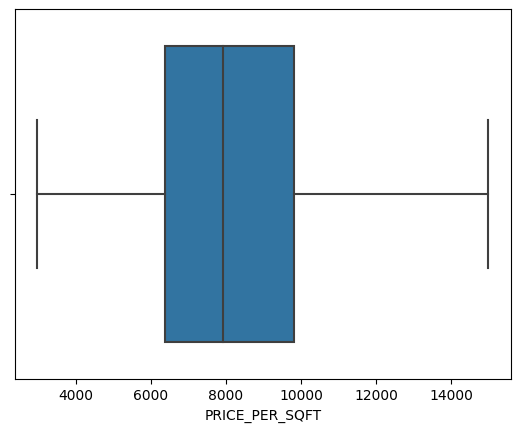

In [84]:
sns.boxplot(df.PRICE_PER_SQFT)

### we can see the correlation among features using heatmap

<AxesSubplot:>

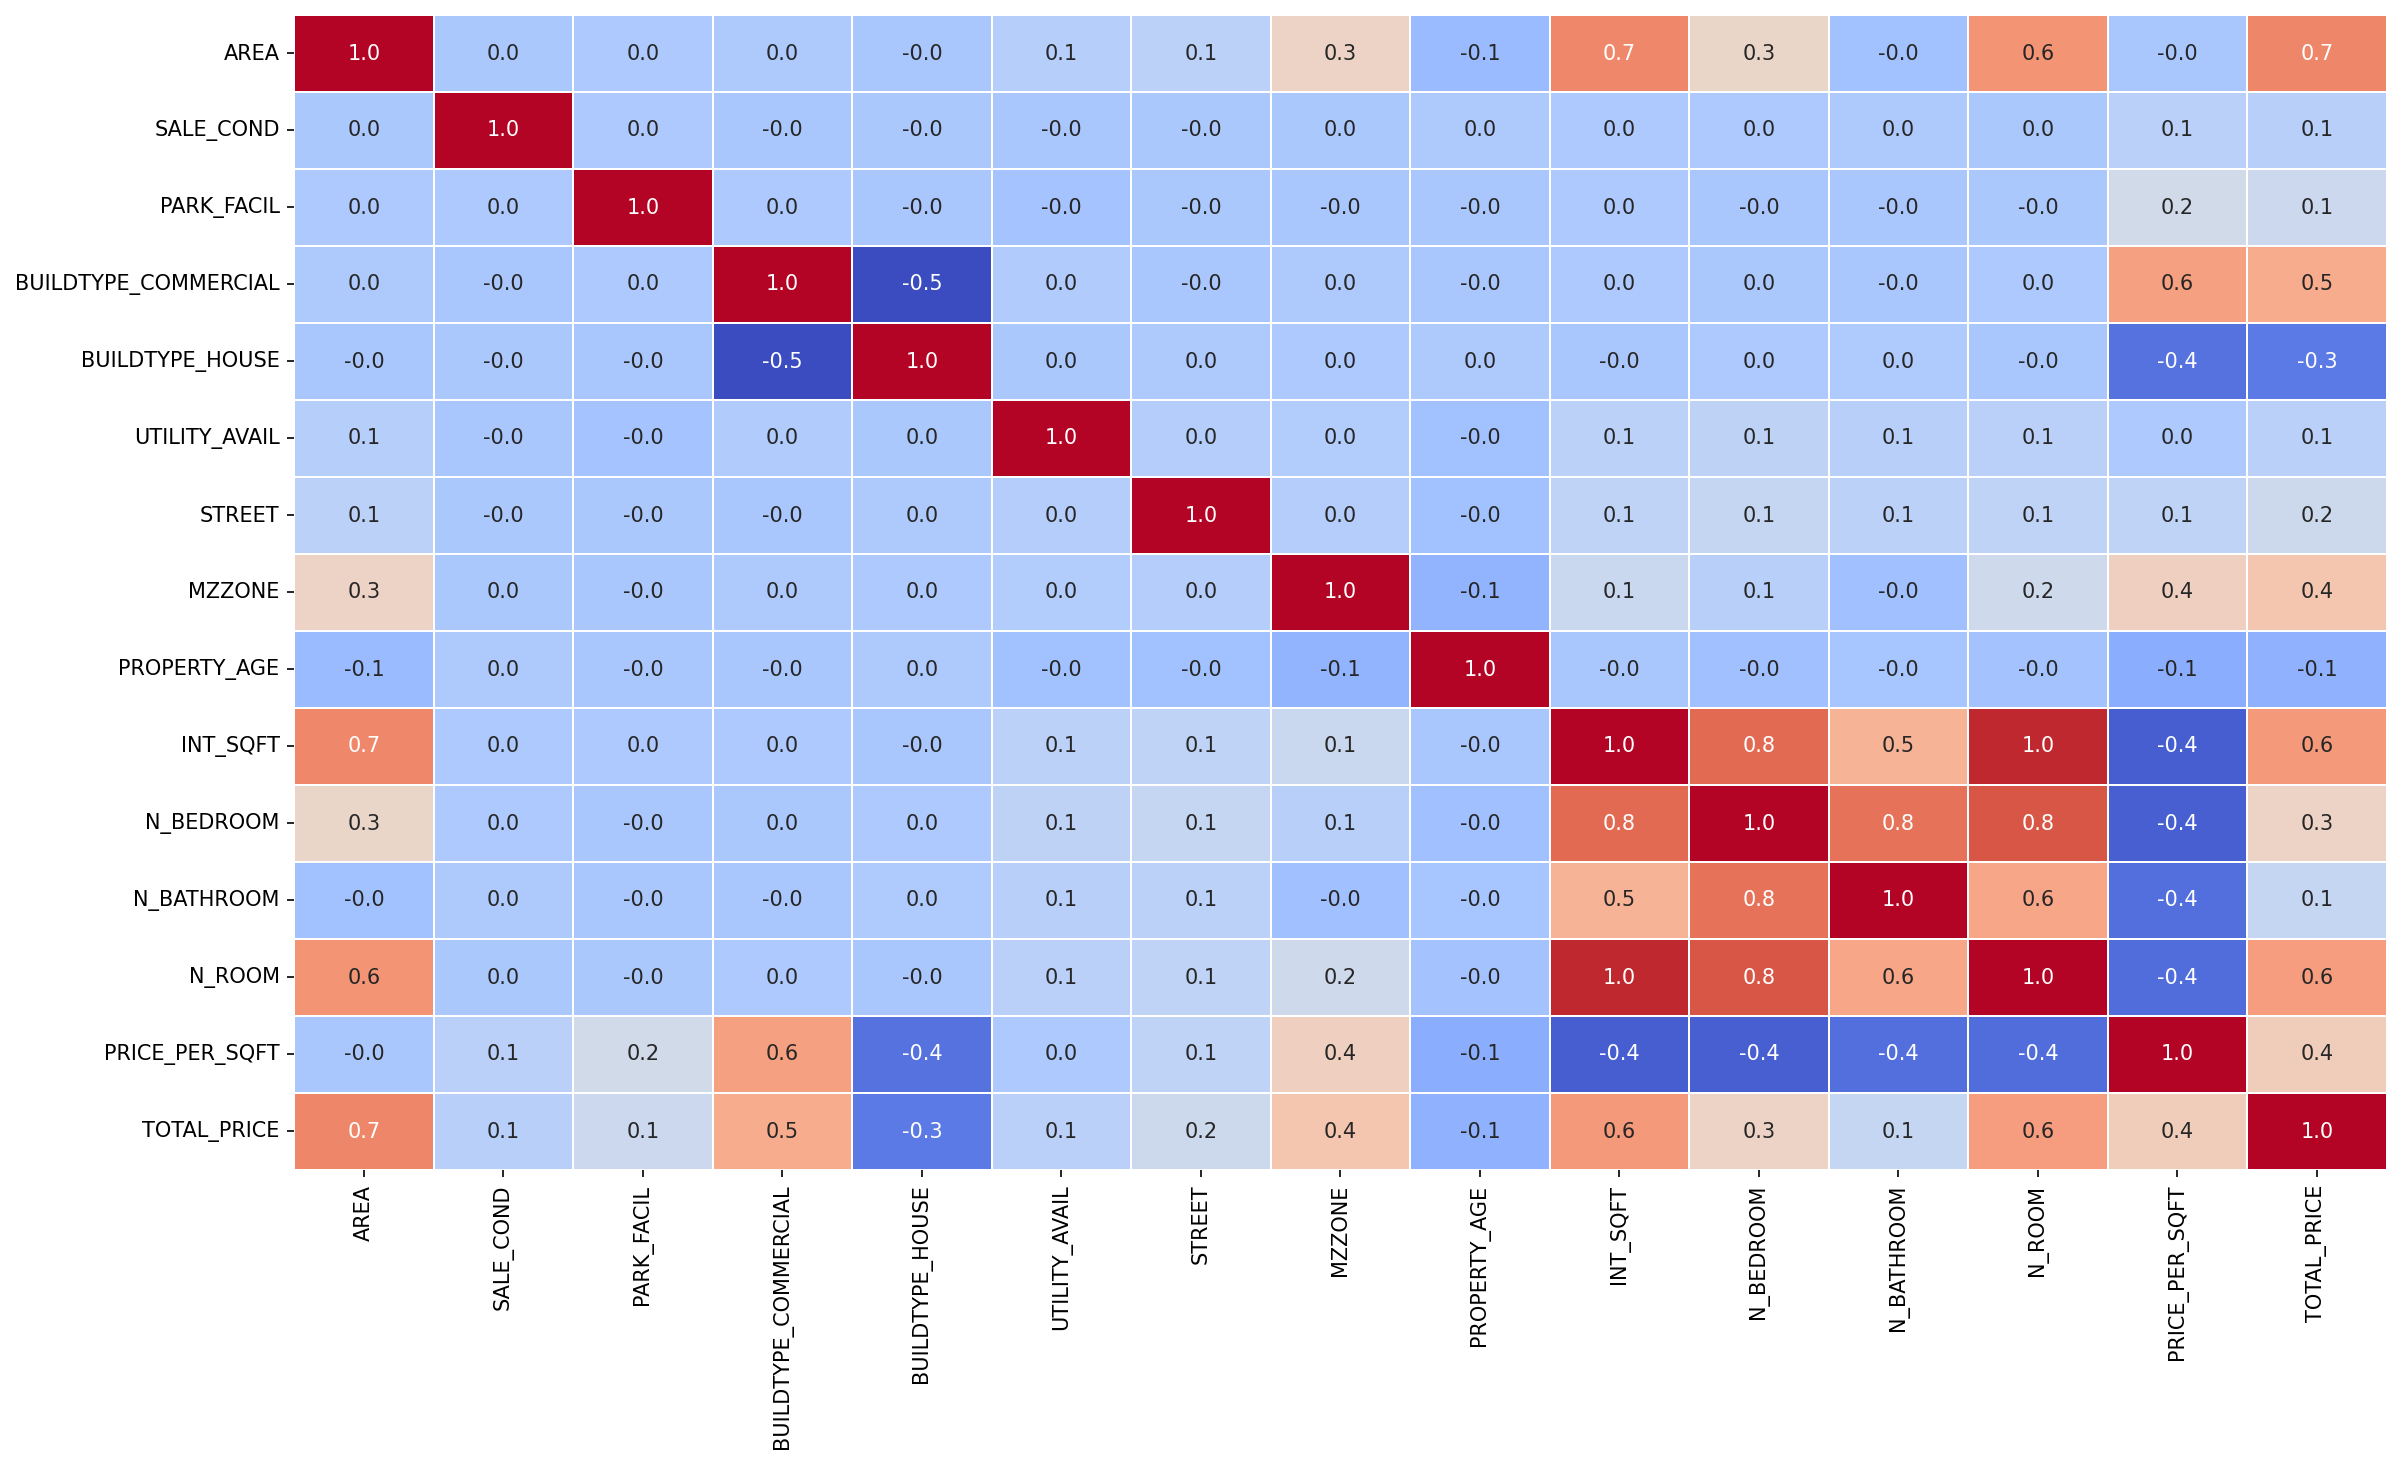

In [85]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm')

### Now we can see a nice coorelation among our features by seeing the above heatmap

# 10. Splitting the data


In [86]:
final_df=df.copy()

In [87]:
x=final_df.drop("TOTAL_PRICE",axis=1)
y=df["TOTAL_PRICE"]

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
x_train

AREA  SALE_COND  PARK_FACIL  BUILDTYPE_COMMERCIAL  BUILDTYPE_HOUSE  \
6027     4          4           0                     0                0   
4262     1          5           0                     0                1   
1763     3          1           0                     1                0   
3946     3          1           1                     0                1   
4249     2          4           0                     0                1   
...    ...        ...         ...                   ...              ...   
3810     3          3           1                     0                1   
5235     3          2           0                     1                0   
5270     5          4           0                     0                1   
5434     3          4           0                     0                0   
885      6          5           1                     0                0   

      UTILITY_AVAIL  STREET  MZZONE  PROPERTY_AGE  INT_SQFT  N_BEDROOM  \
6027              1       2       2            53      1587          2   
4262              2       3       2            14      1266          1   
1763              3       3       4            30       816          1   
3946              4       2       6            28      1142          1   
4249              2       3       6            27      1238          2   
...             ...     ...     ...           ...       ...        ...   
3810              4       3       4            16      1021          1   
5235              2       1       6             7       928          1   
5270              4       3       6            16      2263          4   
5434              2       3       5            14       980          1   
885               3       1       6             6      1878          2   

      N_BATHROOM  N_ROOM  PRICE_PER_SQFT  
6027           1       4         4599.63  
4262           1       3         5137.05  
1763           1       3        12264.83  
3946           1       3         8814.01  
4249           2       4         8583.45  
...          ...     ...             ...  
3810           1       3         9129.09  
5235           1       3        12283.03  
5270           2       6         5451.49  
5434           1       3         9347.04  
885            1       5         8251.42  

[5644 rows x 14 columns]

In [783]:
x_test

AREA  SALE_COND  PARK_FACIL  BUILDTYPE_COMMERCIAL  BUILDTYPE_HOUSE  \
1869     4          1           1                     1                0   
5605     4          3           1                     0                1   
6844     6          1           1                     0                0   
998      1          2           0                     0                0   
6861     1          3           0                     0                1   
...    ...        ...         ...                   ...              ...   
6800     4          1           0                     0                0   
6693     3          2           0                     0                1   
933      7          2           0                     1                0   
2970     6          3           0                     1                0   
5742     1          5           1                     1                0   

      UTILITY_AVAIL  STREET  MZZONE  PROPERTY_AGE  INT_SQFT  N_BEDROOM  \
1869              3       1       4            28      1971          3   
5605              1       2       6            36      1751          2   
6844              1       1       4            16      1911          2   
998               4       1       5            16      1497          2   
6861              3       3       4             6      1071          1   
...             ...     ...     ...           ...       ...        ...   
6800              2       1       3            52      1685          2   
6693              1       1       6            28      1197          1   
933               3       3       5             7      1946          2   
2970              4       2       6            26      1939          2   
5742              4       3       6            27       663          1   

      N_BATHROOM  N_ROOM  PRICE_PER_SQFT  
1869           2       5       7894.3200  
5605           1       4       6141.4700  
6844           1       5       7002.8000  
998            2       4       5454.1600  
6861           1       3       6658.2600  
...          ...     ...             ...  
6800           1       4       4358.7800  
6693           1       3       7031.0800  
933            1       5      11252.6400  
2970           1       5      11245.0900  
5742           1       2      14987.6475  

[1412 rows x 14 columns]

# MODEL CREATION

## USING LINEAR REGRESSION

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print('R2- SCORE:',r2_score(y_test,y_pred_lr))

R2- SCORE: 0.9531235338822689


In [93]:
y_test.values

array([16337696, 11173115, 13850732, ..., 22926829, 22676389, 10544484],
      dtype=int64)

# random forest regressor

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [822]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(x_train, y_train);
y_pred_rf = rf.predict(x_test)
print('R2- SCORE :', r2_score(y_test,y_pred_rf))



R2- SCORE : 0.9904727815142144


# Gradient boosting regressor

## Finding best learning rate value 

In [788]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model1= GradientBoostingRegressor(learning_rate=lr)
  model1.fit(x_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model1.score(x_train,y_train), " Test score : ", model1.score(x_test,y_test))

Learning rate :  0.1  Train score :  0.9932627446493013  Test score :  0.9910615217043649
Learning rate :  0.3  Train score :  0.996154097952161  Test score :  0.9942384230926179
Learning rate :  0.5  Train score :  0.9966300807596418  Test score :  0.9945661009412733
Learning rate :  0.8  Train score :  0.9964473284491074  Test score :  0.9916606218166981
Learning rate :  1  Train score :  0.9966102298560356  Test score :  0.9892586367403315


In [824]:
# altering the parameter values many times this one gives the best r2 score..
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000,)
gbr.fit(x_train, y_train)
y_pred_gb = gbr.predict(x_test)
print('R2- SCORE:',r2_score(y_test,y_pred_gb))

R2- SCORE: 0.9977735521075389


In [825]:
y_pred_gb

array([16436531.65550118, 11289529.83909711, 14148400.38825824, ...,
       22754939.17502688, 22585761.46042807, 11111003.66533529])

In [826]:
y_test.values

array([16337696, 11173115, 13850732, ..., 22926829, 22676389, 10544484],
      dtype=int64)

# ALL THE 3 MODELS GIVES AN EXCELLENT R2 SCORE.


##  1.The Gradient Boosting Regressor gives the highest r2 score of 99.7%  .
##  2. Random forest regressor gives an r2 score of 99%.
##  3. linear regression gives an r2 score of 95%


# we can go for Gradient Boosting Regressor because it outperforms all the models with an r2 score of 99.7

# saving the model to a pickle file

In [832]:
filename="House_prediction.sav"
pickle.dump(gbr,open("House_prediction.sav","wb"))

# loading the saved model 

In [833]:
model=pickle.load(open("House_prediction.sav","rb"))

# Now we can use the model to predict the output

In [834]:
model.predict(x_test)

array([16436531.65550118, 11289529.83909711, 14148400.38825824, ...,
       22754939.17502688, 22585761.46042807, 11111003.66533529])